To get started on our research, we'll install some plotting and data analysis packages and import them

In [135]:
# Install various packages
!pip install pandas
!pip install geopandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install tabulate

You should consider upgrading via the '/Users/kennyle/Desktop/Computer Science/HCDE/HCDE 410/FinalProject/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/kennyle/Desktop/Computer Science/HCDE/HCDE 410/FinalProject/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/kennyle/Desktop/Computer Science/HCDE/HCDE 410/FinalProject/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/kennyle/Desktop/Computer Science/HCDE/HCDE 410/FinalProject/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/kennyle/Desktop/Computer Science/HCDE/HCDE 410/FinalProject/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/kennyle/Desktop/Computer Science/HCDE/HCDE 410/FinalProject/venv/bin/python -m pip install --upgrade pip' command.


In [136]:
# Import packages
import pandas as pd
import geopandas as gpd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Initialize Seaborn
sns.set()

Next we'll define a custom function to read and clean our CSV data files since we need to do it
more than once. Then, we can read in our data.

In [137]:
def read_clean(csv):
    """
    Takes a CSV and returns a Pandas Dataframe of it without any missing values
    :param csv: A Comma Seperated Value file
    :return: a Pandas Dataframe
    """
    data = pd.read_csv(csv)
    data = data.replace('', np.nan, regex=True)
    return data.dropna()

In [138]:
# Read in data
license_2012 = read_clean("data/2012_Business_License.csv")
license_2015 = read_clean("data/2015_Business_License.csv")
license_2021 = read_clean("data/2021_Business_License.csv")

/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/1045404771.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv)


Now that we have our data, let's go ahead and append a column to each dataframe with their
corresponding year so that it'll help us down the road with plotting and analysis (to know which
dataset the data came from).

In [139]:
# Label each dataset with their associated year
license_2012['year'] = 2012
license_2015['year'] = 2015
license_2021['year'] = 2021

# Use common column names for all dataframes
license_2012 = license_2012.rename({"naics_code": "NAICS", "NACISDesc": "Description"}, axis=1)
license_2015 = license_2015.rename({"NAICS Code": "NAICS", "NAICS Description": "Description"}, axis=1)
license_2021 = license_2021.rename({"NAICS Code": "NAICS", "NAICS Description": "Description"}, axis=1)

print(f"2012 License Data: \n {tabulate(license_2012.head(10), headers=license_2012.columns)}")
print()
print(f"2015 License Data: \n {tabulate(license_2015.head(10), headers=license_2015.columns)}")
print()
print(f"2021 License Data: \n {tabulate(license_2021.head(10), headers=license_2021.columns)}")

2012 License Data: 
       business_id  business_legal_name                        Ownership    trade_name                          NAICS  Description                                                   sic_code_id  SIC Description                                           lic_start_date          city_state_zip          year
--  -------------  -----------------------------------------  -----------  --------------------------------  -------  ----------------------------------------------------------  -------------  --------------------------------------------------------  ----------------------  --------------------  ------
 0              5  UNION PACIFIC RAILROAD COMPANY             Corporation  UNION PACIFIC RAILROAD COMPANY     482111  Line-Haul Railroads                                                   575  Railroads, Line-Haul Operating                            07/04/2043 12:00:00 AM  SEATTLE, WA   98108     2012
 1             13  CORE MARK INTL INC                         Corpo

Now we can get started with investigating our research question:
How has Seattle's economy in different sectors changed over time as a result of the growing technology sector in recent years?

The first step is to see how the technology sector has grown from 2012 to 2021. Since there's no one
NAICS (a classification system of companies used by countries in North America) code, that entirely
encapsulates all tech companies, I selected a few NAICS codes* that corresponds to popular tech
companies that exist in Seattle:

| **Company** | **NAICS Code** | **NAICS Description** |
| ----------- | -------------- | --------------------- |
| Amazon      | 518210         | Computing Infrastructure Providers, Data Processing, Web hosting |
| F5          | 541511         | Custom Computer Programming Services |
| Google      | 519130         | Internet Publishing and Broadcasting and Web Search Portals |
| Microsoft   | 511210         | Software Publisher |


*NAICS codes have changed over time being revised in 2002, 2012, 2017, and 2022. The codes listed
here are valid for all datasets, however, according to the [NAICS Search], these codes are only
valid for 2017 and prior.

[NAICS Search]: https://www.census.gov/naics/

Here we define a custom function to filter our dataframes with all the NAICS codes with we selected
for tech businesses.

In [140]:
def filter_tech(data):
    """
    Takes a Pandas Dataframe and filters it to only show tech businesses
    :param data: Pandas Dataframe with NAICS data
    :return: Pandas Dataframe
    """
    is_518210 = data["NAICS"] == 518210
    is_541411 = data["NAICS"] == 541511
    is_519130 = data["NAICS"] == 519310
    is_511210 = data["NAICS"] == 511210

    return data[is_518210 | is_541411 | is_519130 | is_511210]

In [141]:
tech_2012 = filter_tech(license_2012)
tech_2015 = filter_tech(license_2015)
tech_2021 = filter_tech(license_2021)

print(f"2012 Tech Businesses: \n {tabulate(tech_2012.head(10), headers=tech_2012.columns)}")
print()
print(f"2015 Tech Businesses: \n {tabulate(tech_2015.head(10), headers=tech_2015.columns)}")
print()
print(f"2021 Tech Businesses: \n {tabulate(tech_2021.head(10), headers=tech_2021.columns)}")

2012 Tech Businesses: 
         business_id  business_legal_name              Ownership        trade_name                         NAICS  Description                                       sic_code_id  SIC Description                                                   lic_start_date          city_state_zip         year
----  -------------  -------------------------------  ---------------  -------------------------------  -------  ----------------------------------------------  -------------  ----------------------------------------------------------------  ----------------------  -------------------  ------
1336          10129  MCGRAW HILL INC                  Corporation      PUBLICATION/DODGE DIVISIONS       518210  Data Processing, Hosting, and Related Services            867  Computer Processing and Data Preparation and Processing Services  10/01/1973 12:00:00 AM  SEATTLE, WA   98106    2012
2620          22577  ADVANCED COMPUTER SOLUTIONS LTD  Corporation      ADVANCED COMPUTER SOLUT

Once we filtered out datasets, we can now plot it for an easy comparison.

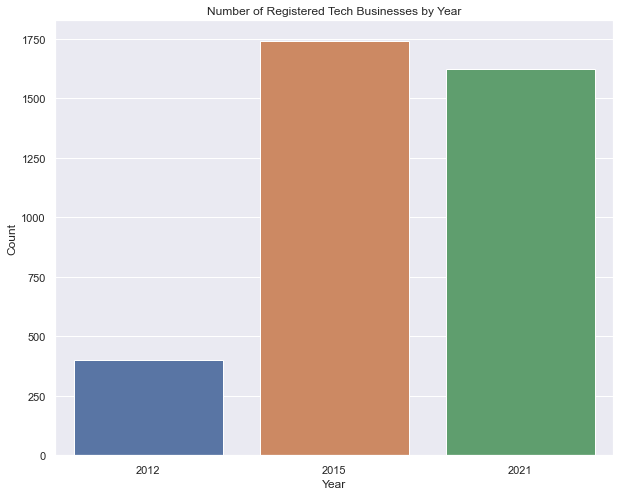

In [142]:
tech_concat = pd.concat([tech_2012, tech_2015, tech_2021])
tech = tech_concat.groupby("year").size().reset_index(name="Count")
# tech_size

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x="year", y="Count", ax=ax, data=tech)
plt.title("Number of Registered Tech Businesses by Year")
plt.xlabel("Year")
plt.savefig("figures/tech_businesses.png", bbox_inches="tight")
plt.show()


Looking at the bar plot, there was a huge increase from 2012 to 2015 and 2021 (an increase of almost
400%). There is a decrease from 2015 to 2021 but, I am guessing that mostly came from the COVID-19
pandemic which forced a number of businesses to close their doors. In either case, a 400% increase
is still a huge growth of the tech sector for Seattle.

The next step is investigate non-tech business growth. To do that, we'll get a count of the number
of businesses per NAICS. We'll print out the top 10 NAICS groupings for 2012, 2015, and 2021.

In [143]:
license_2012_counts = license_2012.groupby(["NAICS", "Description"]).size()
license_2012_counts = license_2012_counts.reset_index(name="Count")
# license_2012_counts.rename({"NACISDesc": "Description", "naics_code": "NAICS"}, axis=1, inplace=True)

license_2015_counts = license_2015.groupby(["NAICS", "Description"]).size()
license_2015_counts = license_2015_counts.reset_index(name="Count")
# license_2015_counts.rename({"NACISDesc": "Description", "naics_code": "NAICS"}, axis=1, inplace=True)

license_2021_counts = license_2021.groupby(["NAICS", "Description"]).size()
license_2021_counts = license_2021_counts.reset_index(name="Count")
# license_2021_counts.rename({"NACISDesc": "Description", "naics_code": "NAICS"}, axis=1, inplace=True)

top_10_2012 = license_2012_counts.sort_values('Count', ascending=False).head(10)
top_10_2015 = license_2015_counts.sort_values('Count', ascending=False).head(10)
top_10_2021 = license_2021_counts.sort_values('Count', ascending=False).head(10)

print(f"2012 NAICS Counts: \n {tabulate(top_10_2012, headers=license_2012_counts.columns)}")
print()
print(f"2015 NAICS Counts: \n {tabulate(top_10_2015, headers=license_2015_counts.columns)}")
print()
print(f"2021 NAICS Counts: \n {tabulate(top_10_2021, headers=license_2021_counts.columns)}")

2012 NAICS Counts: 
        NAICS  Description                                                             Count
---  -------  --------------------------------------------------------------------  -------
762   812990  All Other Personal Services                                              4254
470   453998  All Other Miscellaneous Store Retailers (except Tobacco Stores)          1463
493   485310  Taxi Service                                                             1459
726   722211  Limited-Service Restaurants                                              1374
587   541110  Offices of Lawyers                                                       1266
684   621399  Offices of All Other Miscellaneous Health Practitioners                  1052
 47   236115  New Single-Family Housing Construction (except Operative Builders)        969
630   541990  All Other Professional, Scientific, and Technical Services                933
608   541611  Administrative Management and General Managem

Looks like none of the tech NAICS showed up in the top 10 NAICS groupings which means we can
move forward without having to drop any data. Next, we'll plot the top 10 NAICS groupings for each
of the years in order to get an idea of how many businesses there are for each.

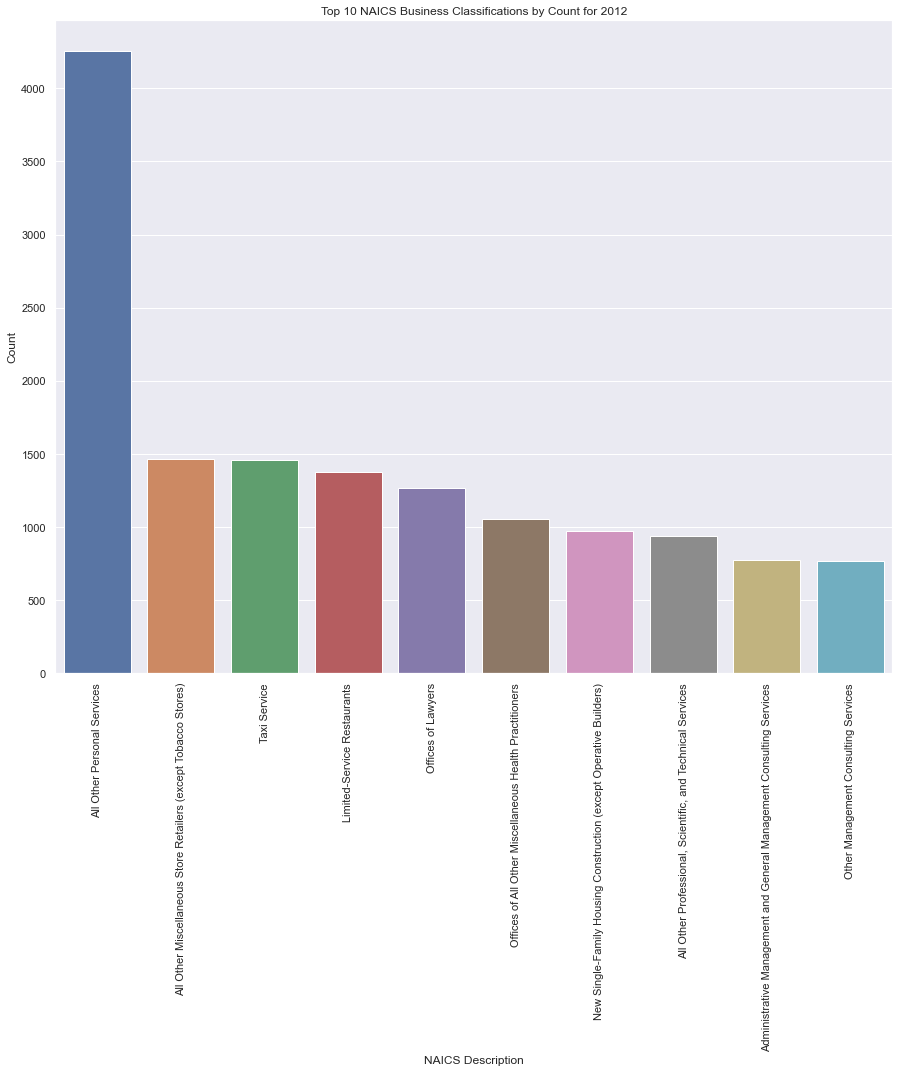

In [144]:
# Create a plot for 2012 data
fig1, ax1 = plt.subplots(figsize=(15, 12))

# PLot 2012 Top 10 NAICS counts
sns.barplot(x="Description", y="Count", ax=ax1, data=top_10_2012)
plt.title("Top 10 NAICS Business Classifications by Count for 2012")
plt.xlabel("NAICS Description")
plt.xticks(rotation=90)
plt.ylabel("Count")

plt.savefig("figures/top_naics_2012.png", bbox_inches="tight")
plt.show()

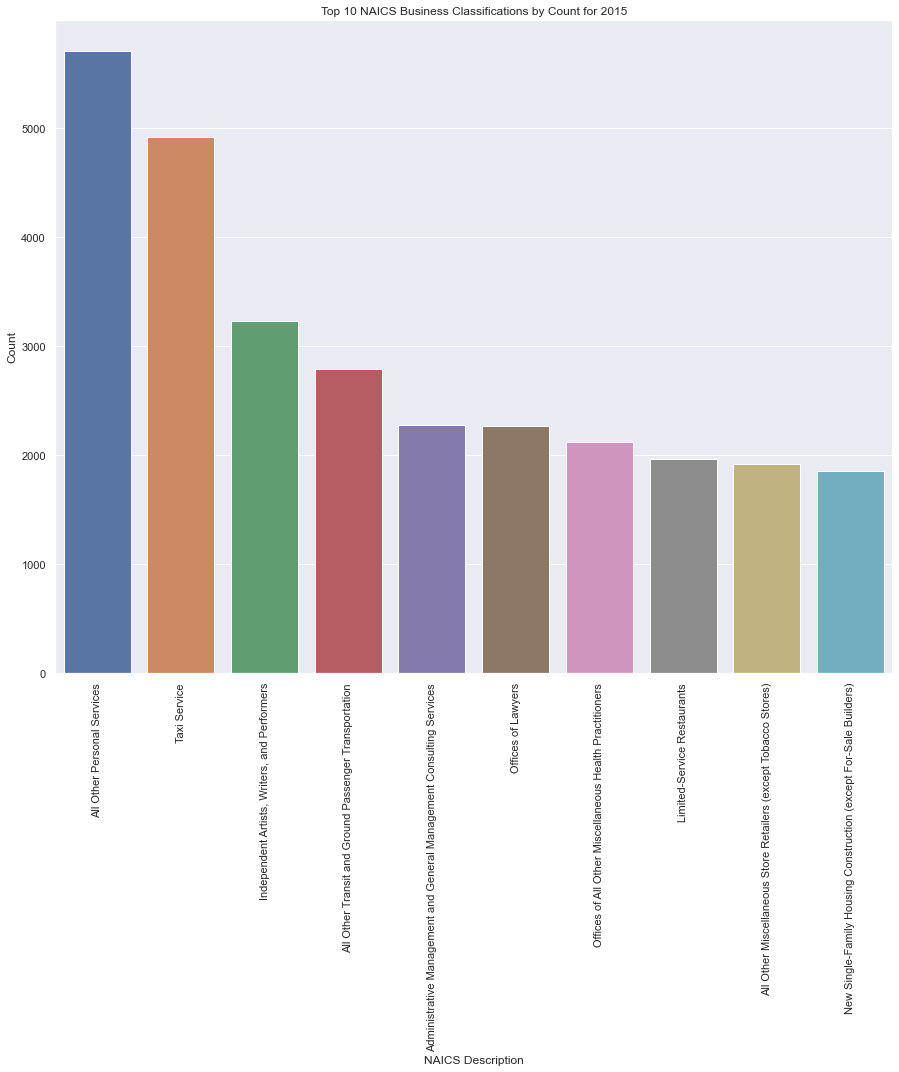

In [145]:
# Create a plot for 2015 data
fig2, ax2 = plt.subplots(figsize=(15, 12))

# PLot 2012 Top 10 NAICS counts
sns.barplot(x="Description", y="Count", ax=ax2, data=top_10_2015)
plt.title("Top 10 NAICS Business Classifications by Count for 2015")
plt.xlabel("NAICS Description")
plt.xticks(rotation=90)
plt.ylabel("Count")

plt.savefig("figures/top_naics_2015.png", bbox_inches="tight")
plt.show()

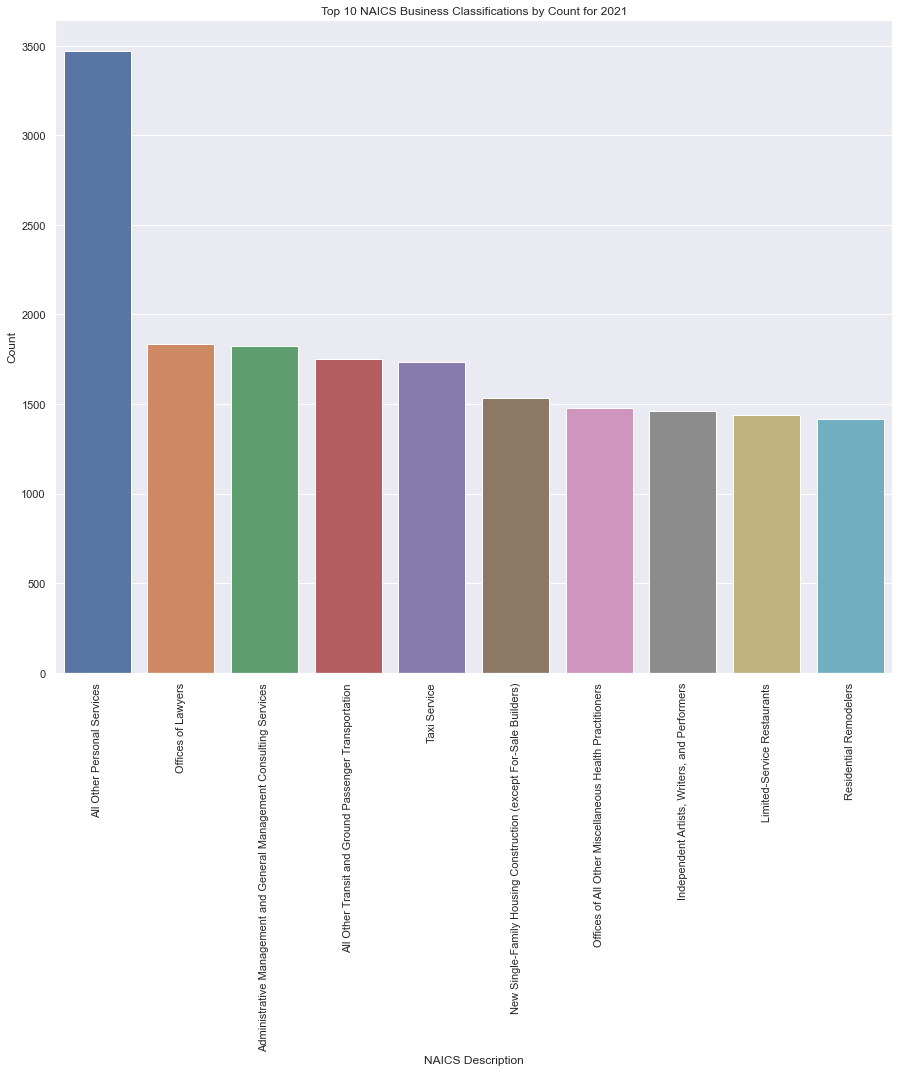

In [146]:
# Create a plot for 2021 data
fig3, ax3 = plt.subplots(figsize=(15, 12))

# PLot 2012 Top 10 NAICS counts
sns.barplot(x="Description", y="Count", ax=ax3, data=top_10_2021)
plt.title("Top 10 NAICS Business Classifications by Count for 2021")
plt.xlabel("NAICS Description")
plt.xticks(rotation=90)
plt.ylabel("Count")

plt.savefig("figures/top_naics_2021.png", bbox_inches="tight")
plt.show()

Looks like there's not a lot of variability between the top 10 NAICS groupings for each year. The
ones that have shown up in all 3 are:

- 236115 - New Single Family Housing Construction
- 485310 - Taxi services
- 541110 - Lawyer services
- 541611 - Administrative management and general management consulting services
- 621399 - Office of all other miscellaneous health practitioners
- 812990 - All other personal services

Let's create a plot for each of these to compare how the numbers have changed over the years. First,
we'll define another custom function to filter our data to the appropriate NAICS group and then
concat all 3 years into one dataframe for easier plotting.

In [147]:
def concat_naics(df_list, naics):
    """
    Takes a list of dataframes, filters for a specific NAICS,
    concats the dataframes together, and gets a count by NAICS by year
    :param df_list: a list of dataframes
    :param naics: a NAICS code
    :return: a dataframe
    """
    concat_list = [df[df["NAICS"] == naics] for df in df_list]
    concat = pd.concat(concat_list)
    counts = concat.groupby("year").size().reset_index(name="Count")
    return counts

In [148]:
licenses = [license_2012, license_2015, license_2021]
construction = concat_naics(licenses, 236115)
taxi = concat_naics(licenses, 485310)
lawyer = concat_naics(licenses, 541110)
admin = concat_naics(licenses, 541611)
health = concat_naics(licenses, 621399)
other = concat_naics(licenses, 812990)

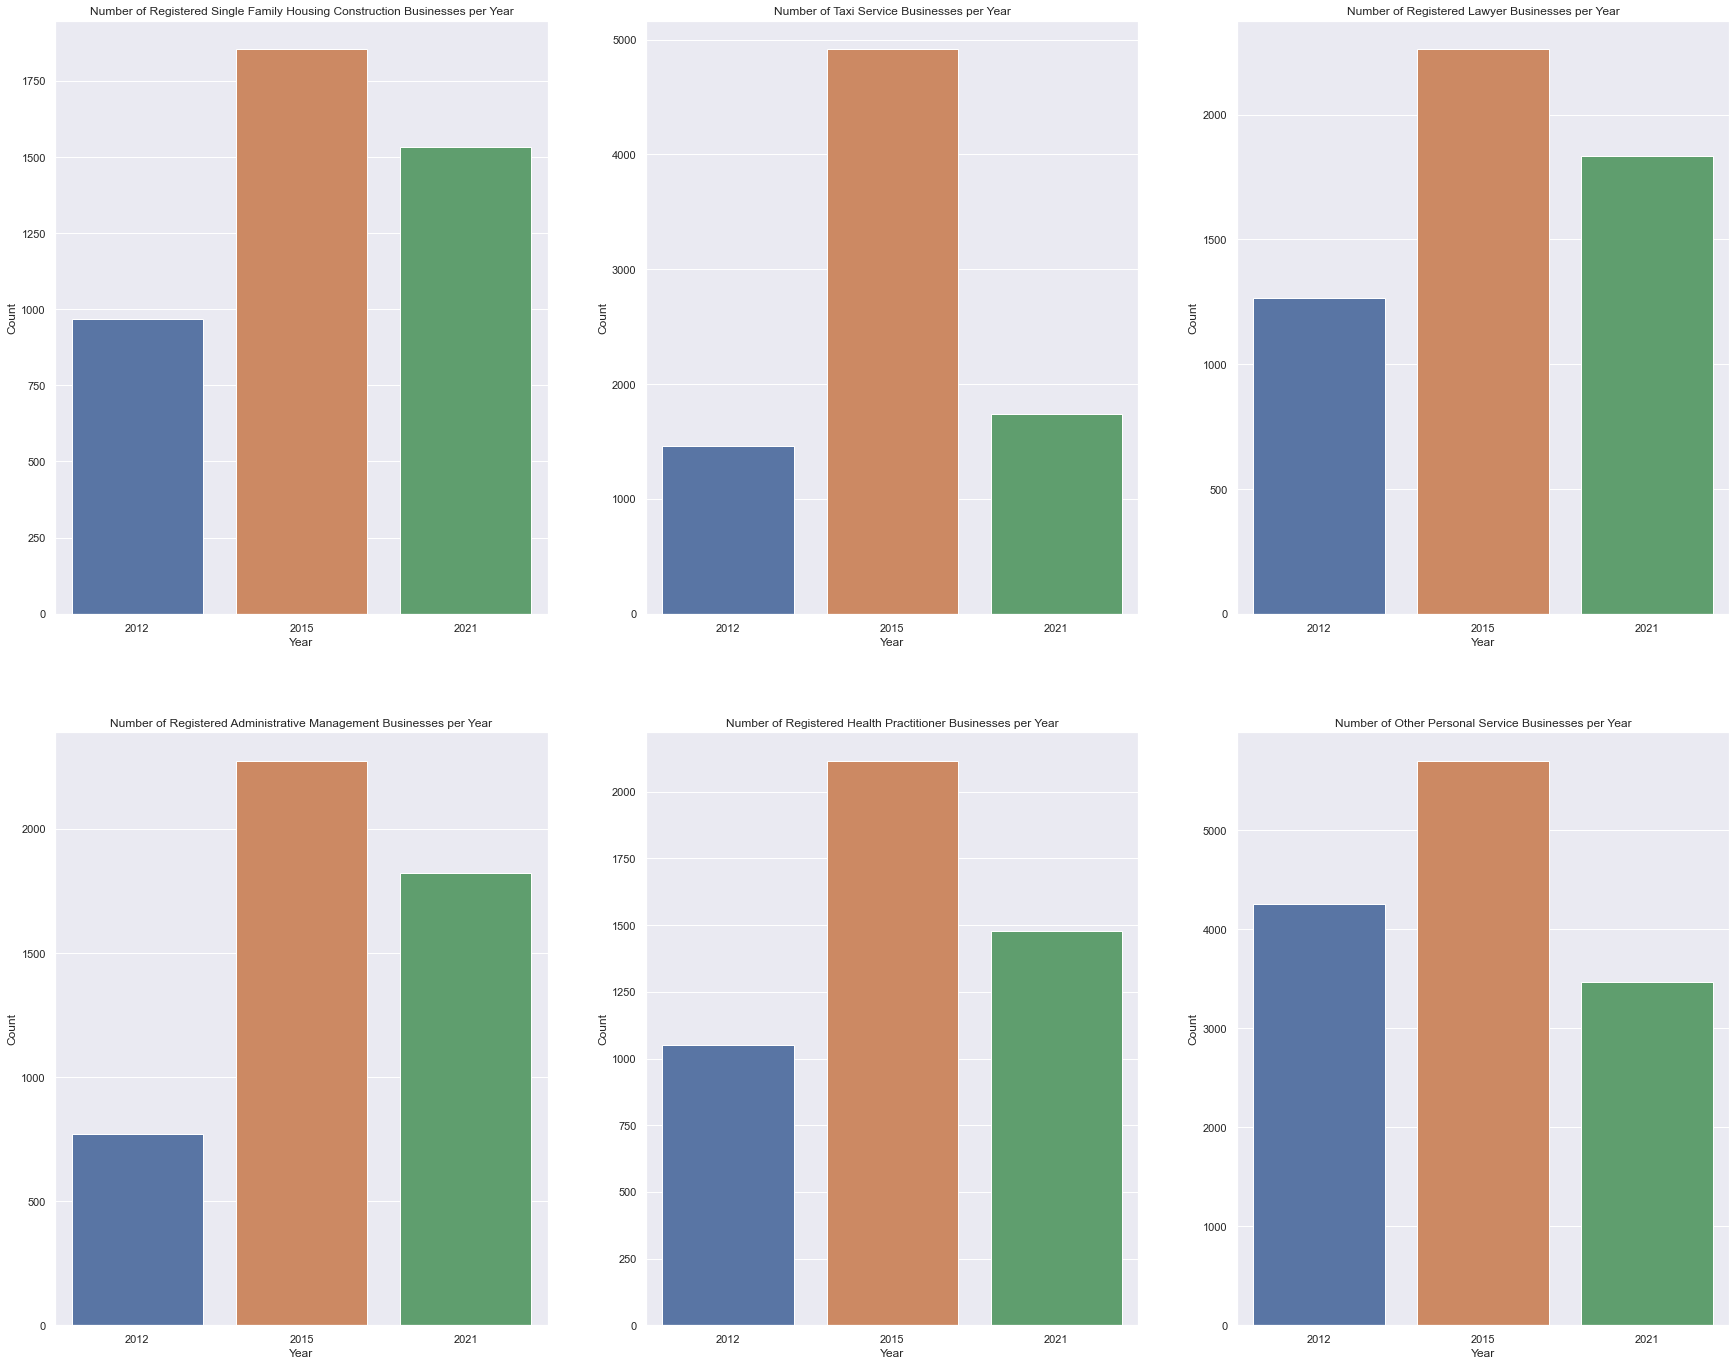

In [149]:
fig, ax = plt.subplots(2, 3, figsize=(30, 24))

sns.barplot(x="year", y="Count", ax=ax[0][0], data=construction)
ax[0][0].set_title("Number of Registered Single Family Housing Construction Businesses per Year")
ax[0][0].set_xlabel("Year")

sns.barplot(x="year", y="Count", ax=ax[0][1], data=taxi)
ax[0][1].set_title("Number of Taxi Service Businesses per Year")
ax[0][1].set_xlabel("Year")

sns.barplot(x="year", y="Count", ax=ax[0][2], data=lawyer)
ax[0][2].set_title("Number of Registered Lawyer Businesses per Year")
ax[0][2].set_xlabel("Year")

sns.barplot(x="year", y="Count", ax=ax[1][0], data=admin)
ax[1][0].set_title("Number of Registered Administrative Management Businesses per Year")
ax[1][0].set_xlabel("Year")

sns.barplot(x="year", y="Count", ax=ax[1][1], data=health)
ax[1][1].set_title("Number of Registered Health Practitioner Businesses per Year")
ax[1][1].set_xlabel("Year")

sns.barplot(x="year", y="Count", ax=ax[1][2], data=other)
ax[1][2].set_title("Number of Other Personal Service Businesses per Year")
ax[1][2].set_xlabel("Year")

plt.savefig("figures/top_business_changes_comparison.png", bbox_inches="tight")
plt.show()

There's a lot of interesting things that appear from looking at these bar plots. In all of these
NAICS groupings, the number of registered businesses increased from 2012 to 2015, but decreased
in 2021. This is consistent with how the tech sector changed over time as well, with an increase
from 2012 to 2015 but a decrease in 2021. Virtually all sectors decreased in 2021 because of what
I'm guessing to be the COVID-19 pandemic that caused a lockdown in 2020. Though what is interesting
to see is how much each sector increased or decreased over time:

| NAICS Grouping | NAICS Code | 2012 &rarr; 2015 Change | 2015 &rarr; 2021 Change |
| -------------- | ---------- | ----------------------- | ----------------------- |
| Tech           | 518210, 541511, 519310, 511210 | +333.92% | -6.72%             |
| Construction   | 236115     | +91.43                  | -17.30%                 |
| Taxi           | 485310     | +237.15%                | -64.71%                 |
| Lawyer         | 541110     | +78.83%                 | -19.04%                 |
| Admin          | 541611     | +194.69%                | -19.87%                 |
| Health         | 621399     | +101.24%                | -30.137%                |
| Other          | 812990     | +34.04%                 | -39.16%                 |

Looking at the data, it doesn't seem that the increase in the tech sector from 2012 to 2015 has
negatively affected any other sector. From the top sectors between all three years, there was an
increase in the number of registered businesses, although not as drastic as the tech sector has
increased. When the number of registered businesses for the tech sector decreased from 2015 to 2021,
there were also decreases. I suspect these trends are a result of the growing tech sector. Since
the tech sector is growing, it is attracting more individuals to Seattle and thus other businesses
must grow as well to accommodate those additional people in the city.


For the next part of our analysis, we'll take a look at how Seattle's economy has changed at
different areas throughout the city. For this part, we'll be using Seattle's Zipcode areas as they
each represent distinct parts of the city.

In [150]:
seattle_zipcodes = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98110, 98111, 98112, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 98126, 98129, 98131, 98132, 98133, 98134, 98136, 98138, 98144, 98145, 98146, 98148, 98151, 98154, 98155, 98158, 98160, 98161, 98164, 98166, 98168, 98170, 98171, 98174, 98177, 98178, 98181, 98184, 98185, 98188, 98190, 98191, 98195, 98198, 98199]
seattle_zipcode_data = gpd.read_file("data/SeattleZipcodes")
seattle_zipcode_data

,OBJECTID,ZIP,ZIPCODE,COUNTY,SHAPE_Leng,SHAPE_Area,geometry
0,1,98031,98031,033,117508.211718,2.280129e+08,"POLYGON ((-122.21842 47.43750, -122.21935 47.4..."
1,2,98032,98032,033,166737.664791,4.826754e+08,"MULTIPOLYGON (((-122.24187 47.44122, -122.2411..."
2,3,98033,98033,033,101363.840369,2.566747e+08,"POLYGON ((-122.20571 47.65170, -122.20511 47.6..."
3,4,98034,98034,033,98550.452509,2.725072e+08,"POLYGON ((-122.17551 47.73706, -122.17554 47.7..."
4,5,98030,98030,033,94351.264837,2.000954e+08,"POLYGON ((-122.16746 47.38549, -122.16746 47.3..."
...,...,...,...,...,...,...,...
199,200,98402,98402,053,30734.178112,2.612224e+07,"POLYGON ((-122.44279 47.26479, -122.44272 47.2..."
200,201,98403,98403,053,23495.038425,2.890938e+07,"POLYGON ((-122.44382 47.26617, -122.44434 47.2..."
201,202,98404,98404,053,61572.154365,2.160645e+08,"POLYGON ((-122.38900 47.23495, -122.38932 47.2..."
202,203,98405,98405,053,50261.100559,1.193118e+08,"POLYGON ((-122.44092 47.23639, -122.44944 47.2..."


In [151]:
def parse_zipcode(dataframe, column_name):
    zipcode_list = []
    full_zip = dataframe[column_name].str.split(" ")
    for entry in full_zip:
        zipcode = entry[len(entry) - 1][:5]
        zipcode_list.append(zipcode)
    return zipcode_list

In [152]:
# Prepare zipcode column for each tech data frame
tech_2012.loc[:, "Zip"] = parse_zipcode(tech_2012, "city_state_zip")
tech_2015.loc[:, "Zip"] = parse_zipcode(tech_2015, "City, State, ZIP")
tech_2021.loc[:, "Zip"] = tech_2021["Zip"].str[:5]

/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/3648515511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_2012.loc[:, "Zip"] = parse_zipcode(tech_2012, "city_state_zip")
/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/3648515511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_2015.loc[:, "Zip"] = parse_zipcode(tech_2015, "City, State, ZIP")
/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/3648515511.py:4: SettingWithCopyWarning: 
A value i

In [153]:
def get_zipcode_counts(data, zipcode_data, seattle_zipcodes):
    counts = data.groupby("Zip").size()
    counts = counts.reset_index(name="Count")
    merged = zipcode_data.merge(counts, left_on="ZIPCODE", right_on="Zip", how="inner")
    merged_filtered = merged[merged["ZIP"].isin(seattle_zipcodes)]
    return merged_filtered

In [154]:
tech_zipcode_2012 = get_zipcode_counts(tech_2012, seattle_zipcode_data, seattle_zipcodes)
tech_zipcode_2015 = get_zipcode_counts(tech_2015, seattle_zipcode_data, seattle_zipcodes)
tech_zipcode_2021 = get_zipcode_counts(tech_2021, seattle_zipcode_data, seattle_zipcodes)

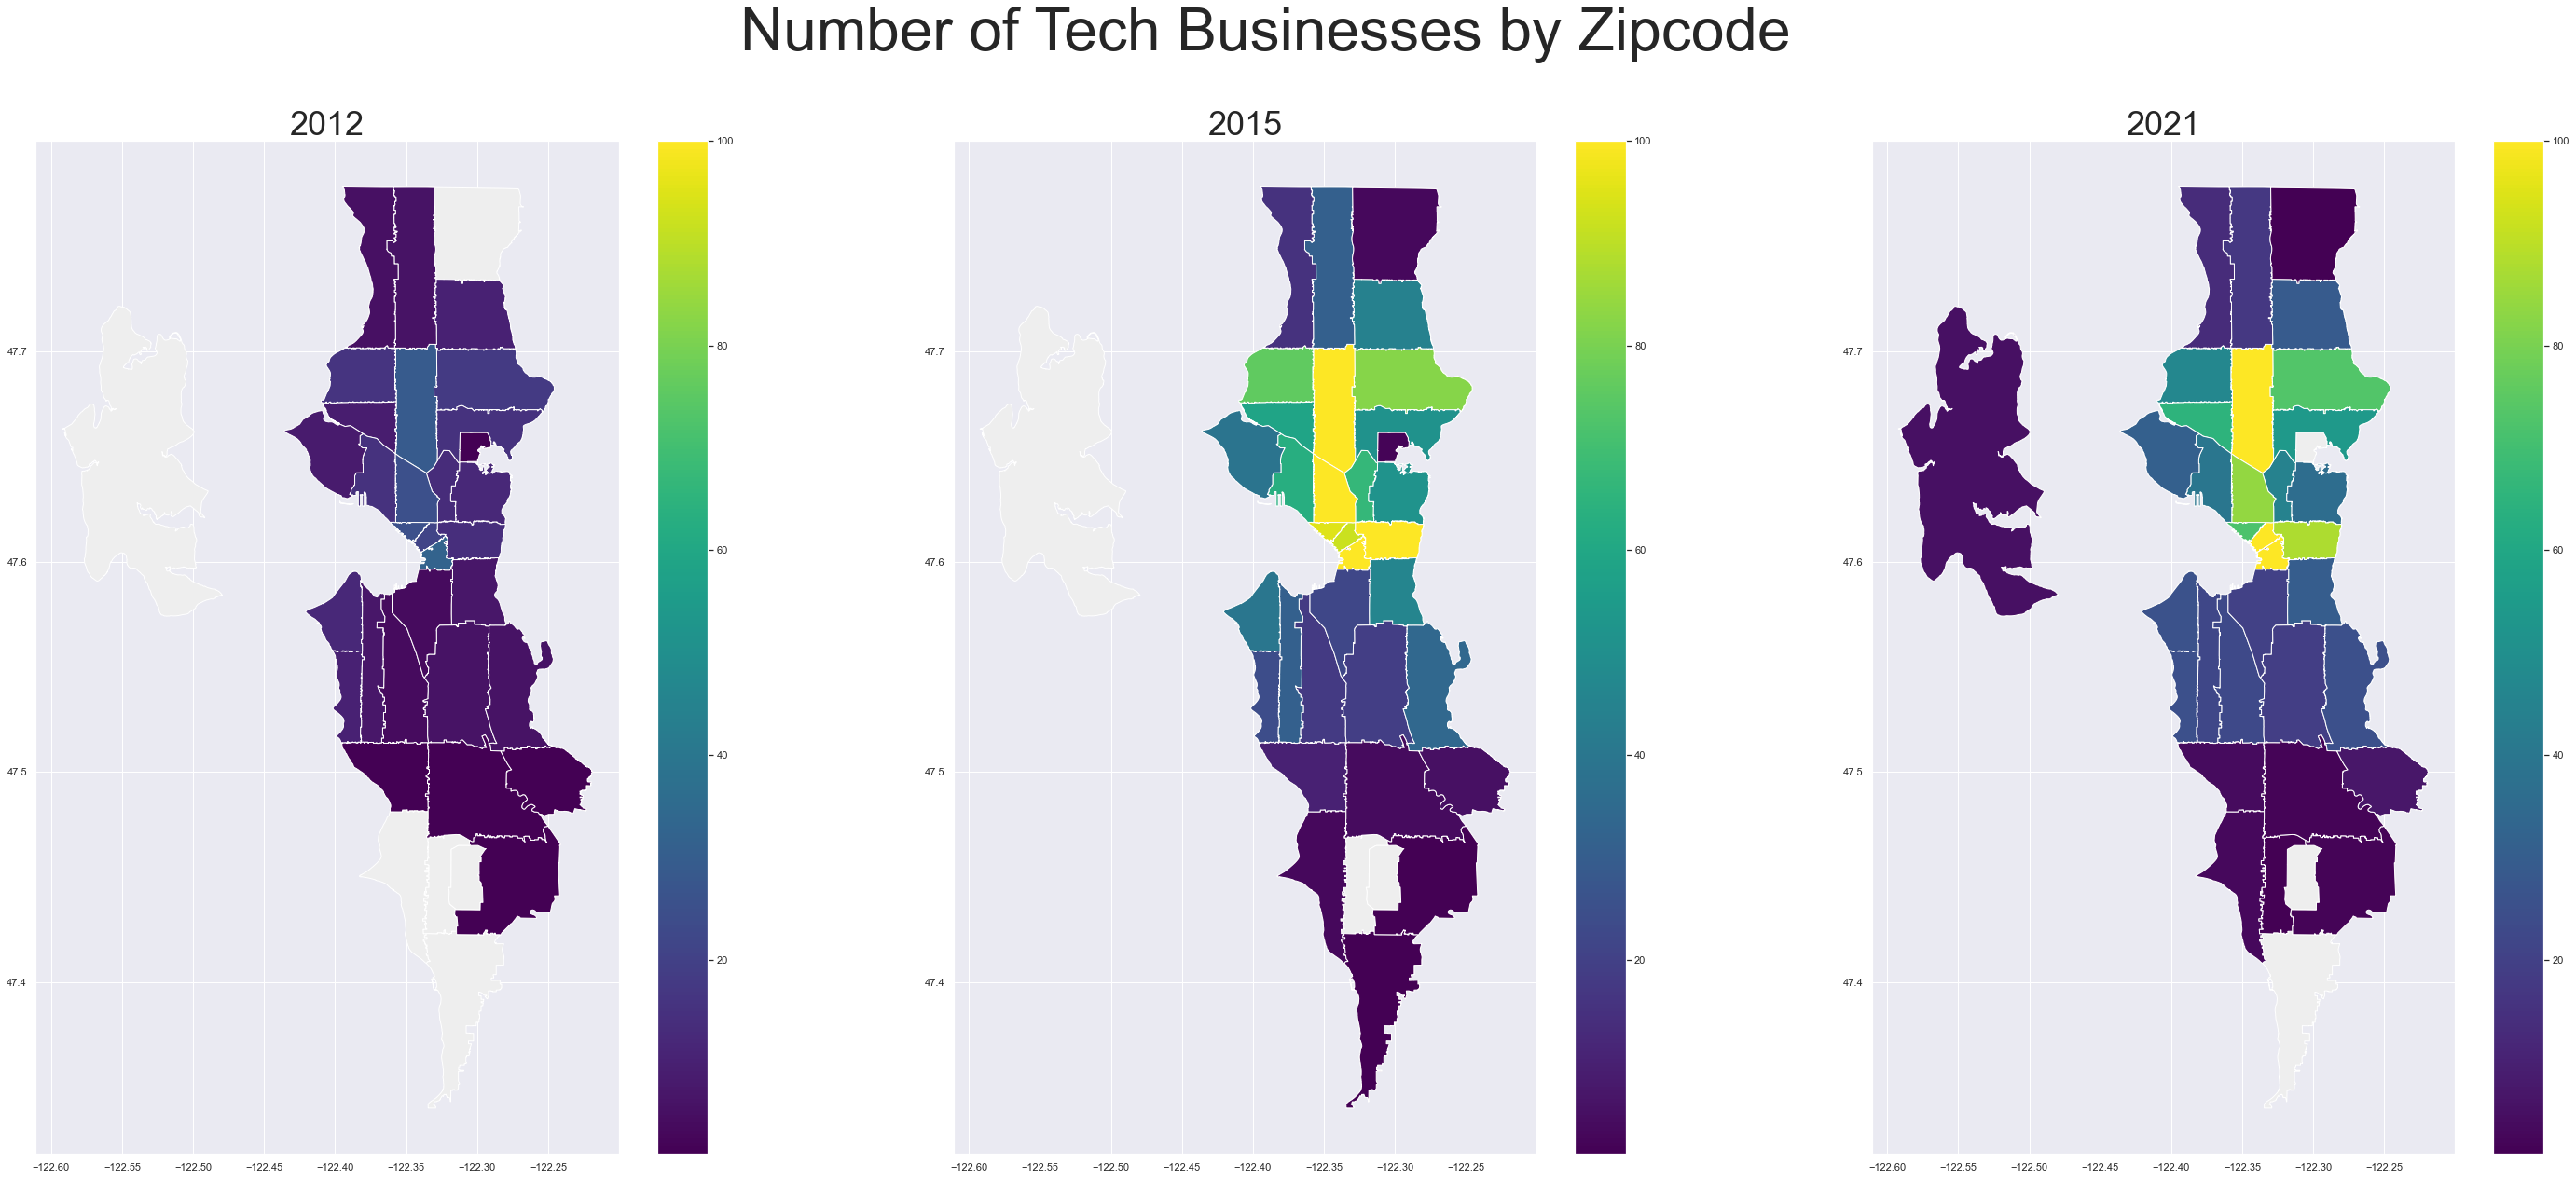

In [155]:
fig, ax = plt.subplots(1, 3, figsize=(50, 20))
fig.suptitle("Number of Tech Businesses by Zipcode", fontsize=64)

seattle_plot = seattle_zipcode_data[seattle_zipcode_data["ZIP"].isin(seattle_zipcodes)]
seattle_plot.plot(ax=ax[0], color="#EEEEEE")
seattle_plot.plot(ax=ax[1], color="#EEEEEE")
seattle_plot.plot(ax=ax[2], color="#EEEEEE")

tech_zipcode_2012.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[0])
ax[0].set_title("2012", fontsize=36)

tech_zipcode_2015.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[1])
ax[1].set_title("2015", fontsize=36)

tech_zipcode_2021.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[2])
ax[2].set_title("2021", fontsize=36)

plt.savefig("figures/tech_businesses_per_zipcode.png", bbox_inches="tight")
plt.show()

In [156]:
def filter_naics(data, naics):
    """
    Takes a Pandas Dataframe and filters it to only show naics
    :param data: Pandas Dataframe with NAICS data
    :return: Pandas Dataframe
    """
    is_naics = data["NAICS"] == naics
    return data[is_naics]

/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/3148661631.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  construction_2012.loc[:, "Zip"] = parse_zipcode(construction_2012, "city_state_zip")
/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/3148661631.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  construction_2015.loc[:, "Zip"] = parse_zipcode(construction_2015, "City, State, ZIP")
/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/3148661631.py:9: Se

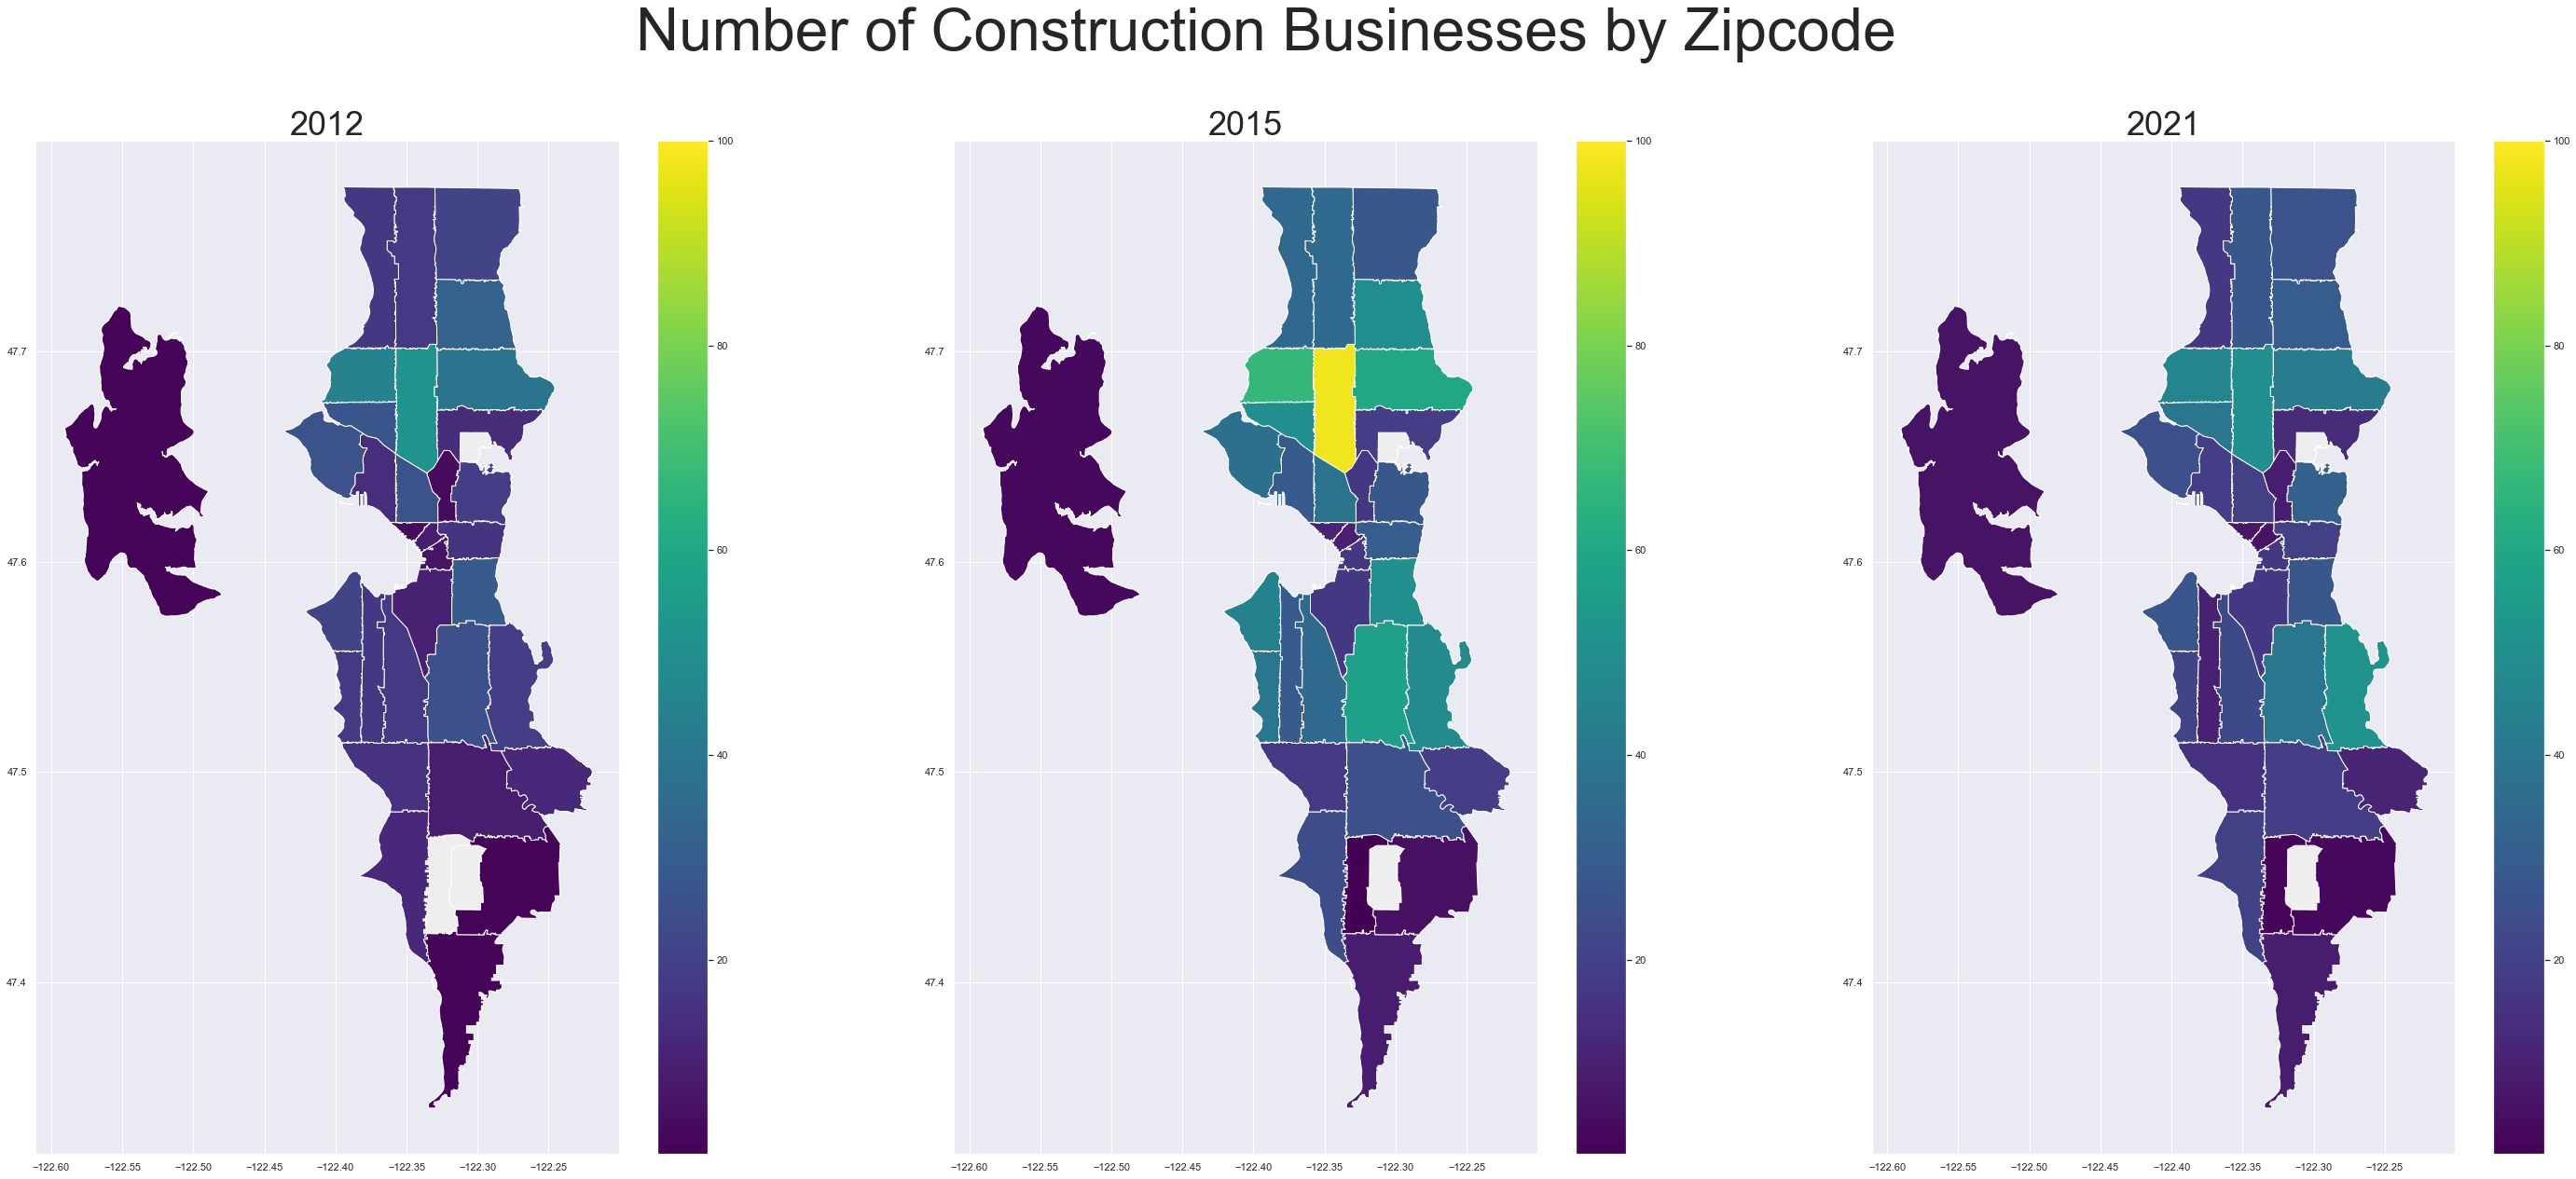

In [157]:
# Construction data for each year
construction_2012 = filter_naics(license_2012, 236115)
construction_2015 = filter_naics(license_2015, 236115)
construction_2021 = filter_naics(license_2021, 236115)

# Add a zipcode column for each dataset
construction_2012.loc[:, "Zip"] = parse_zipcode(construction_2012, "city_state_zip")
construction_2015.loc[:, "Zip"] = parse_zipcode(construction_2015, "City, State, ZIP")
construction_2021.loc[:, "Zip"] = construction_2021["Zip"].str[:5]

# Get the number of businesses per zipcode
construction_zipcode_2012 = get_zipcode_counts(construction_2012, seattle_zipcode_data, seattle_zipcodes)
construction_zipcode_2015 = get_zipcode_counts(construction_2015, seattle_zipcode_data, seattle_zipcodes)
construction_zipcode_2021 = get_zipcode_counts(construction_2021, seattle_zipcode_data, seattle_zipcodes)

# Plot the data
fig, ax = plt.subplots(1, 3, figsize=(50, 20))
fig.suptitle("Number of Construction Businesses by Zipcode", fontsize=64)

seattle_plot = seattle_zipcode_data[seattle_zipcode_data["ZIP"].isin(seattle_zipcodes)]
seattle_plot.plot(ax=ax[0], color="#EEEEEE")
seattle_plot.plot(ax=ax[1], color="#EEEEEE")
seattle_plot.plot(ax=ax[2], color="#EEEEEE")

construction_zipcode_2012.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[0])
ax[0].set_title("2012", fontsize=36)

construction_zipcode_2015.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[1])
ax[1].set_title("2015", fontsize=36)

construction_zipcode_2021.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[2])
ax[2].set_title("2021", fontsize=36)

plt.savefig("figures/construction_businesses_per_zipcode.png", bbox_inches="tight")
plt.show()

/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/2919721965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_2012.loc[:, "Zip"] = parse_zipcode(taxi_2012, "city_state_zip")
/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/2919721965.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_2015.loc[:, "Zip"] = parse_zipcode(taxi_2015, "City, State, ZIP")
/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/2919721965.py:8: SettingWithCopyWarning: 
A value i

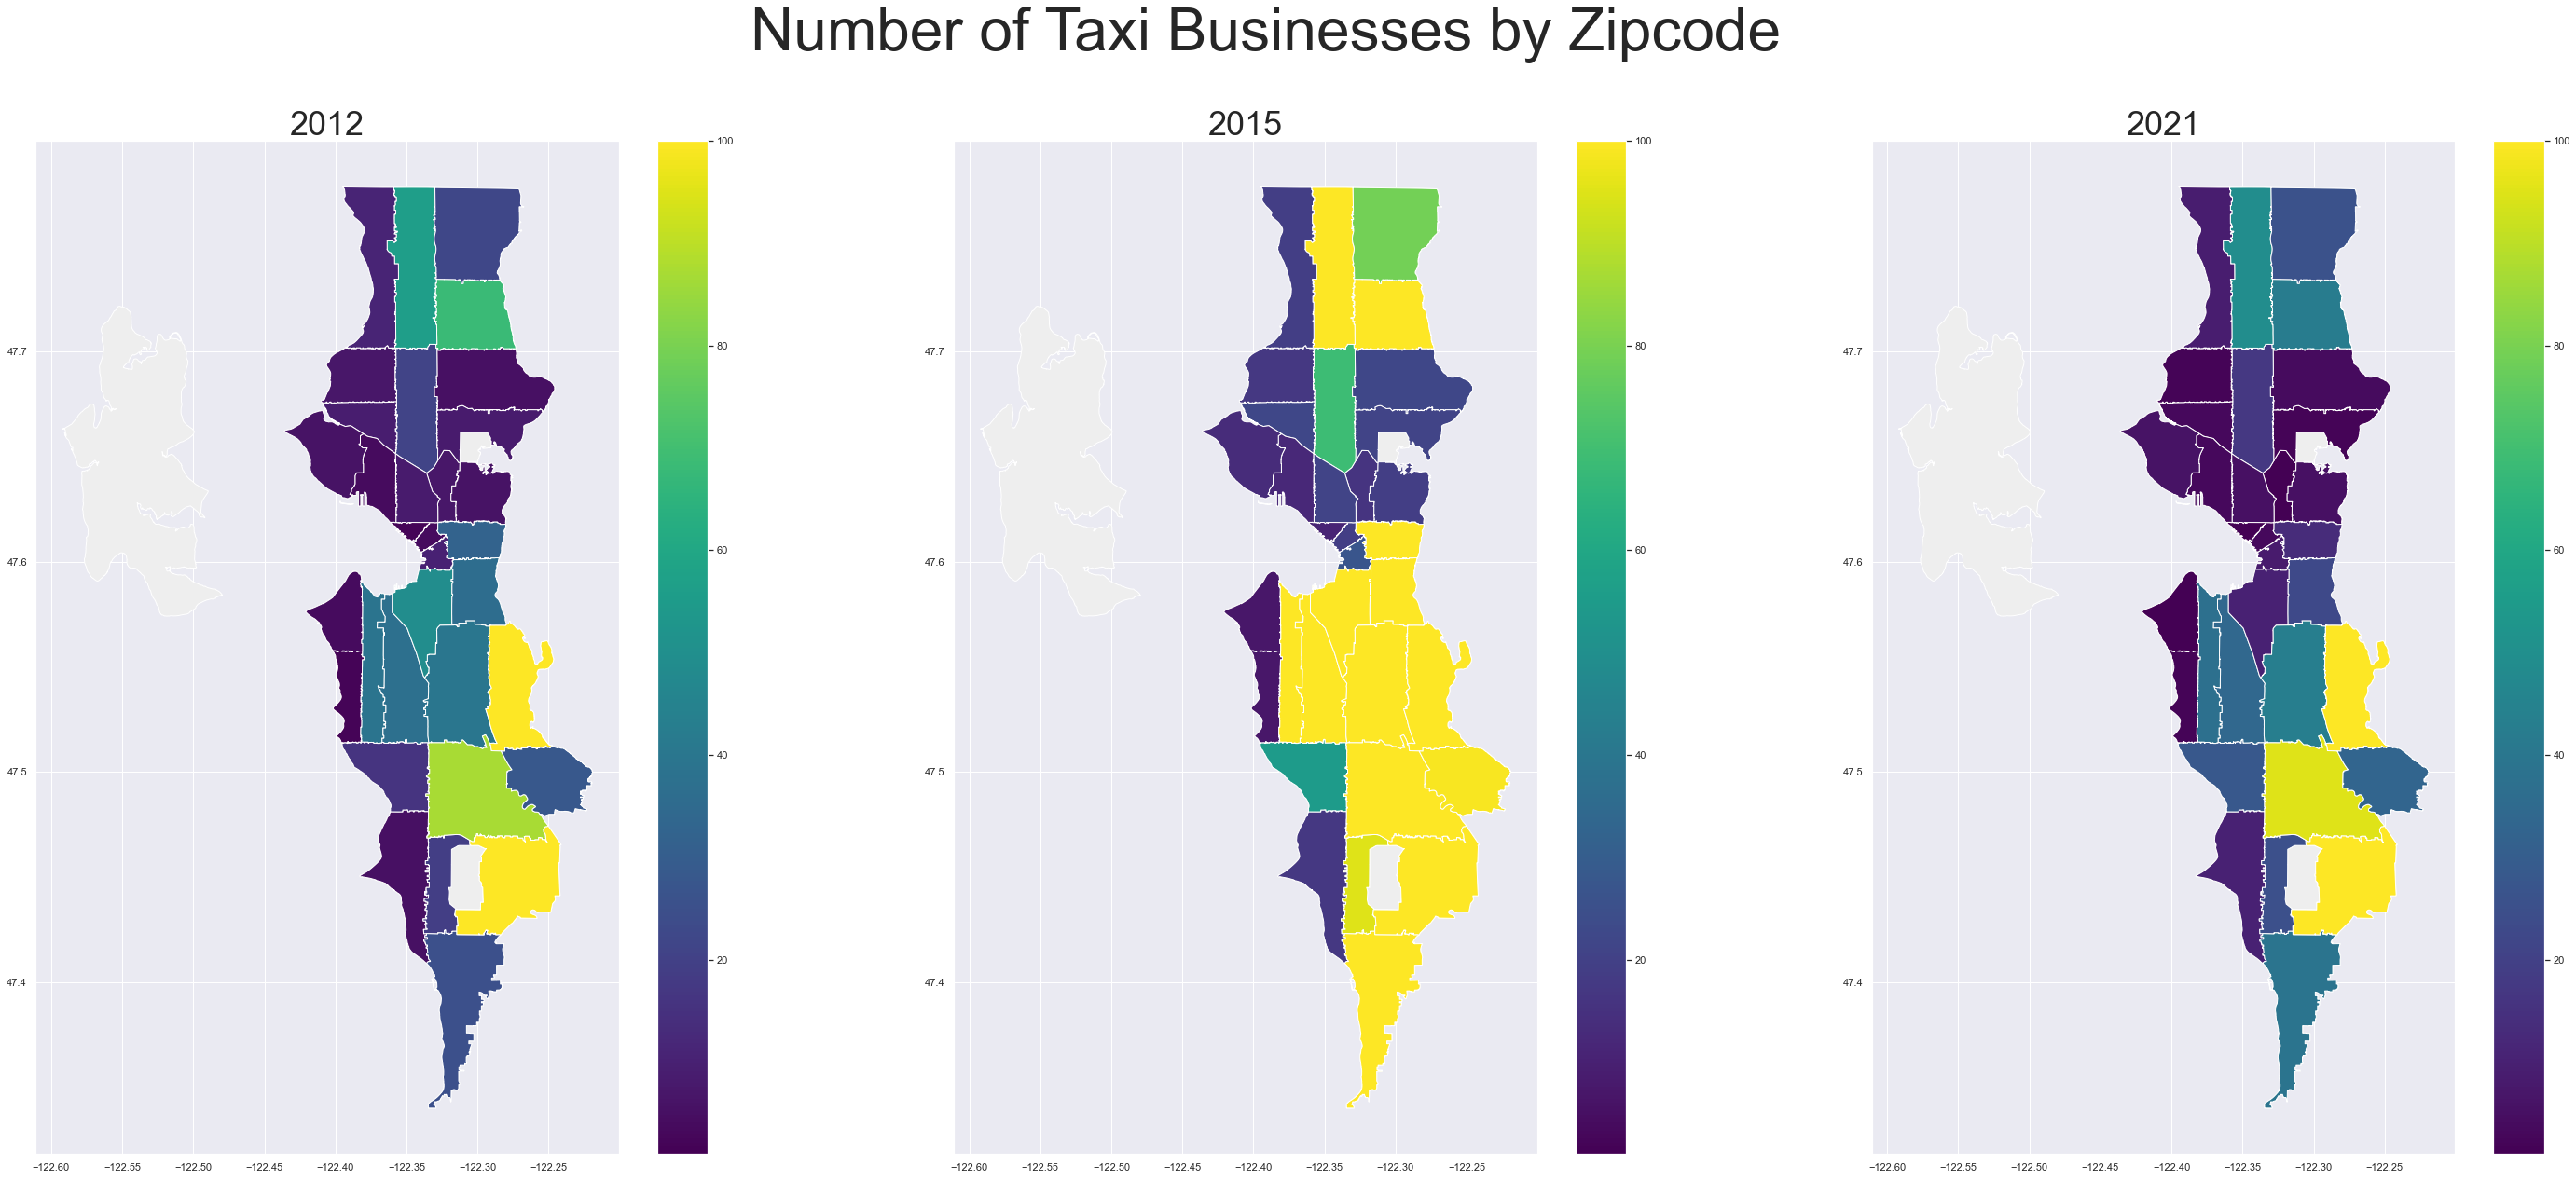

In [158]:
# Taxi data for each year
taxi_2012 = filter_naics(license_2012, 485310)
taxi_2015 = filter_naics(license_2015, 485310)
taxi_2021 = filter_naics(license_2021, 485310)

taxi_2012.loc[:, "Zip"] = parse_zipcode(taxi_2012, "city_state_zip")
taxi_2015.loc[:, "Zip"] = parse_zipcode(taxi_2015, "City, State, ZIP")
taxi_2021.loc[:, "Zip"] = taxi_2021["Zip"].str[:5]

# Get the number of businesses per zipcode
taxi_zipcode_2012 = get_zipcode_counts(taxi_2012, seattle_zipcode_data, seattle_zipcodes)
taxi_zipcode_2015 = get_zipcode_counts(taxi_2015, seattle_zipcode_data, seattle_zipcodes)
taxi_zipcode_2021 = get_zipcode_counts(taxi_2021, seattle_zipcode_data, seattle_zipcodes)

# Plot the data
fig, ax = plt.subplots(1, 3, figsize=(50, 20))
fig.suptitle("Number of Taxi Businesses by Zipcode", fontsize=64)

seattle_plot = seattle_zipcode_data[seattle_zipcode_data["ZIP"].isin(seattle_zipcodes)]
seattle_plot.plot(ax=ax[0], color="#EEEEEE")
seattle_plot.plot(ax=ax[1], color="#EEEEEE")
seattle_plot.plot(ax=ax[2], color="#EEEEEE")

taxi_zipcode_2012.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[0])
ax[0].set_title("2012", fontsize=36)

taxi_zipcode_2015.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[1])
ax[1].set_title("2015", fontsize=36)

taxi_zipcode_2021.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[2])
ax[2].set_title("2021", fontsize=36)

plt.savefig("figures/taxi_businesses_per_zipcode.png", bbox_inches="tight")
plt.show()

/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/461123063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lawyer_2012.loc[:, "Zip"] = parse_zipcode(lawyer_2012, "city_state_zip")
/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/461123063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lawyer_2015.loc[:, "Zip"] = parse_zipcode(lawyer_2015, "City, State, ZIP")
/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/461123063.py:8: SettingWithCopyWarning: 
A va

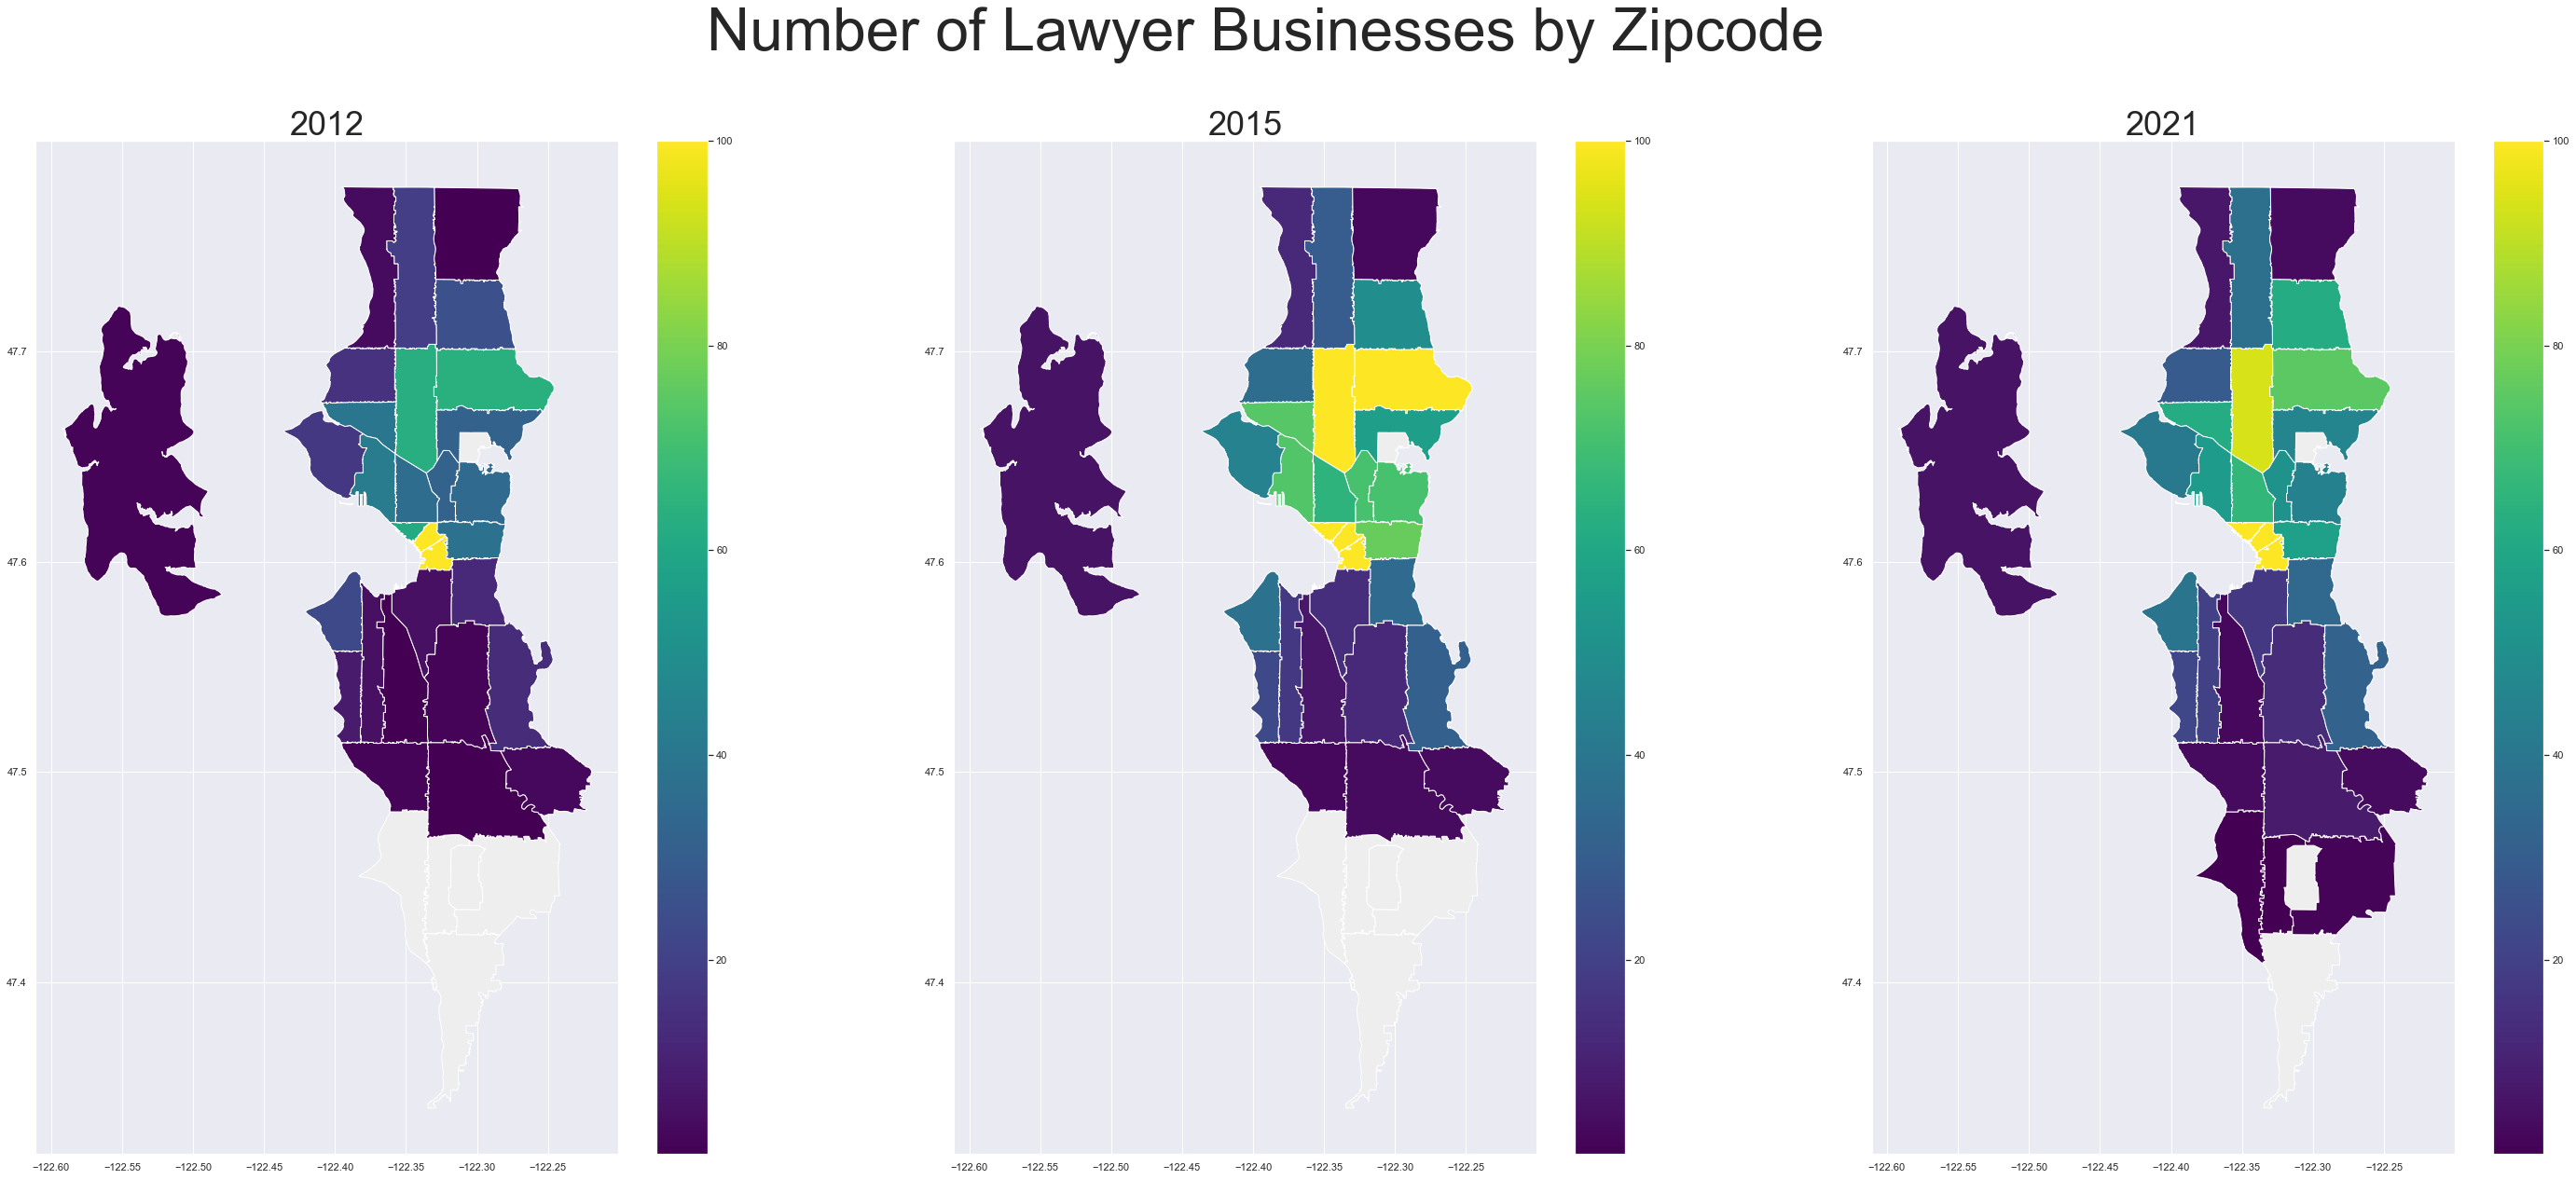

In [159]:
# Lawyer data for each year
lawyer_2012 = filter_naics(license_2012, 541110)
lawyer_2015 = filter_naics(license_2015, 541110)
lawyer_2021 = filter_naics(license_2021, 541110)

lawyer_2012.loc[:, "Zip"] = parse_zipcode(lawyer_2012, "city_state_zip")
lawyer_2015.loc[:, "Zip"] = parse_zipcode(lawyer_2015, "City, State, ZIP")
lawyer_2021.loc[:, "Zip"] = lawyer_2021["Zip"].str[:5]

# Get the number of businesses per zipcode
lawyer_zipcode_2012 = get_zipcode_counts(lawyer_2012, seattle_zipcode_data, seattle_zipcodes)
lawyer_zipcode_2015 = get_zipcode_counts(lawyer_2015, seattle_zipcode_data, seattle_zipcodes)
lawyer_zipcode_2021 = get_zipcode_counts(lawyer_2021, seattle_zipcode_data, seattle_zipcodes)

# Plot the data
fig, ax = plt.subplots(1, 3, figsize=(50, 20))
fig.suptitle("Number of Lawyer Businesses by Zipcode", fontsize=64)

seattle_plot = seattle_zipcode_data[seattle_zipcode_data["ZIP"].isin(seattle_zipcodes)]
seattle_plot.plot(ax=ax[0], color="#EEEEEE")
seattle_plot.plot(ax=ax[1], color="#EEEEEE")
seattle_plot.plot(ax=ax[2], color="#EEEEEE")

lawyer_zipcode_2012.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[0])
ax[0].set_title("2012", fontsize=36)

lawyer_zipcode_2015.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[1])
ax[1].set_title("2015", fontsize=36)

lawyer_zipcode_2021.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[2])
ax[2].set_title("2021", fontsize=36)

plt.savefig("figures/lawyer_businesses_per_zipcode.png", bbox_inches="tight")
plt.show()

/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/802820638.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admin_2012.loc[:, "Zip"] = parse_zipcode(admin_2012, "city_state_zip")
/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/802820638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admin_2015.loc[:, "Zip"] = parse_zipcode(admin_2015, "City, State, ZIP")
/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/802820638.py:8: SettingWithCopyWarning: 
A value 

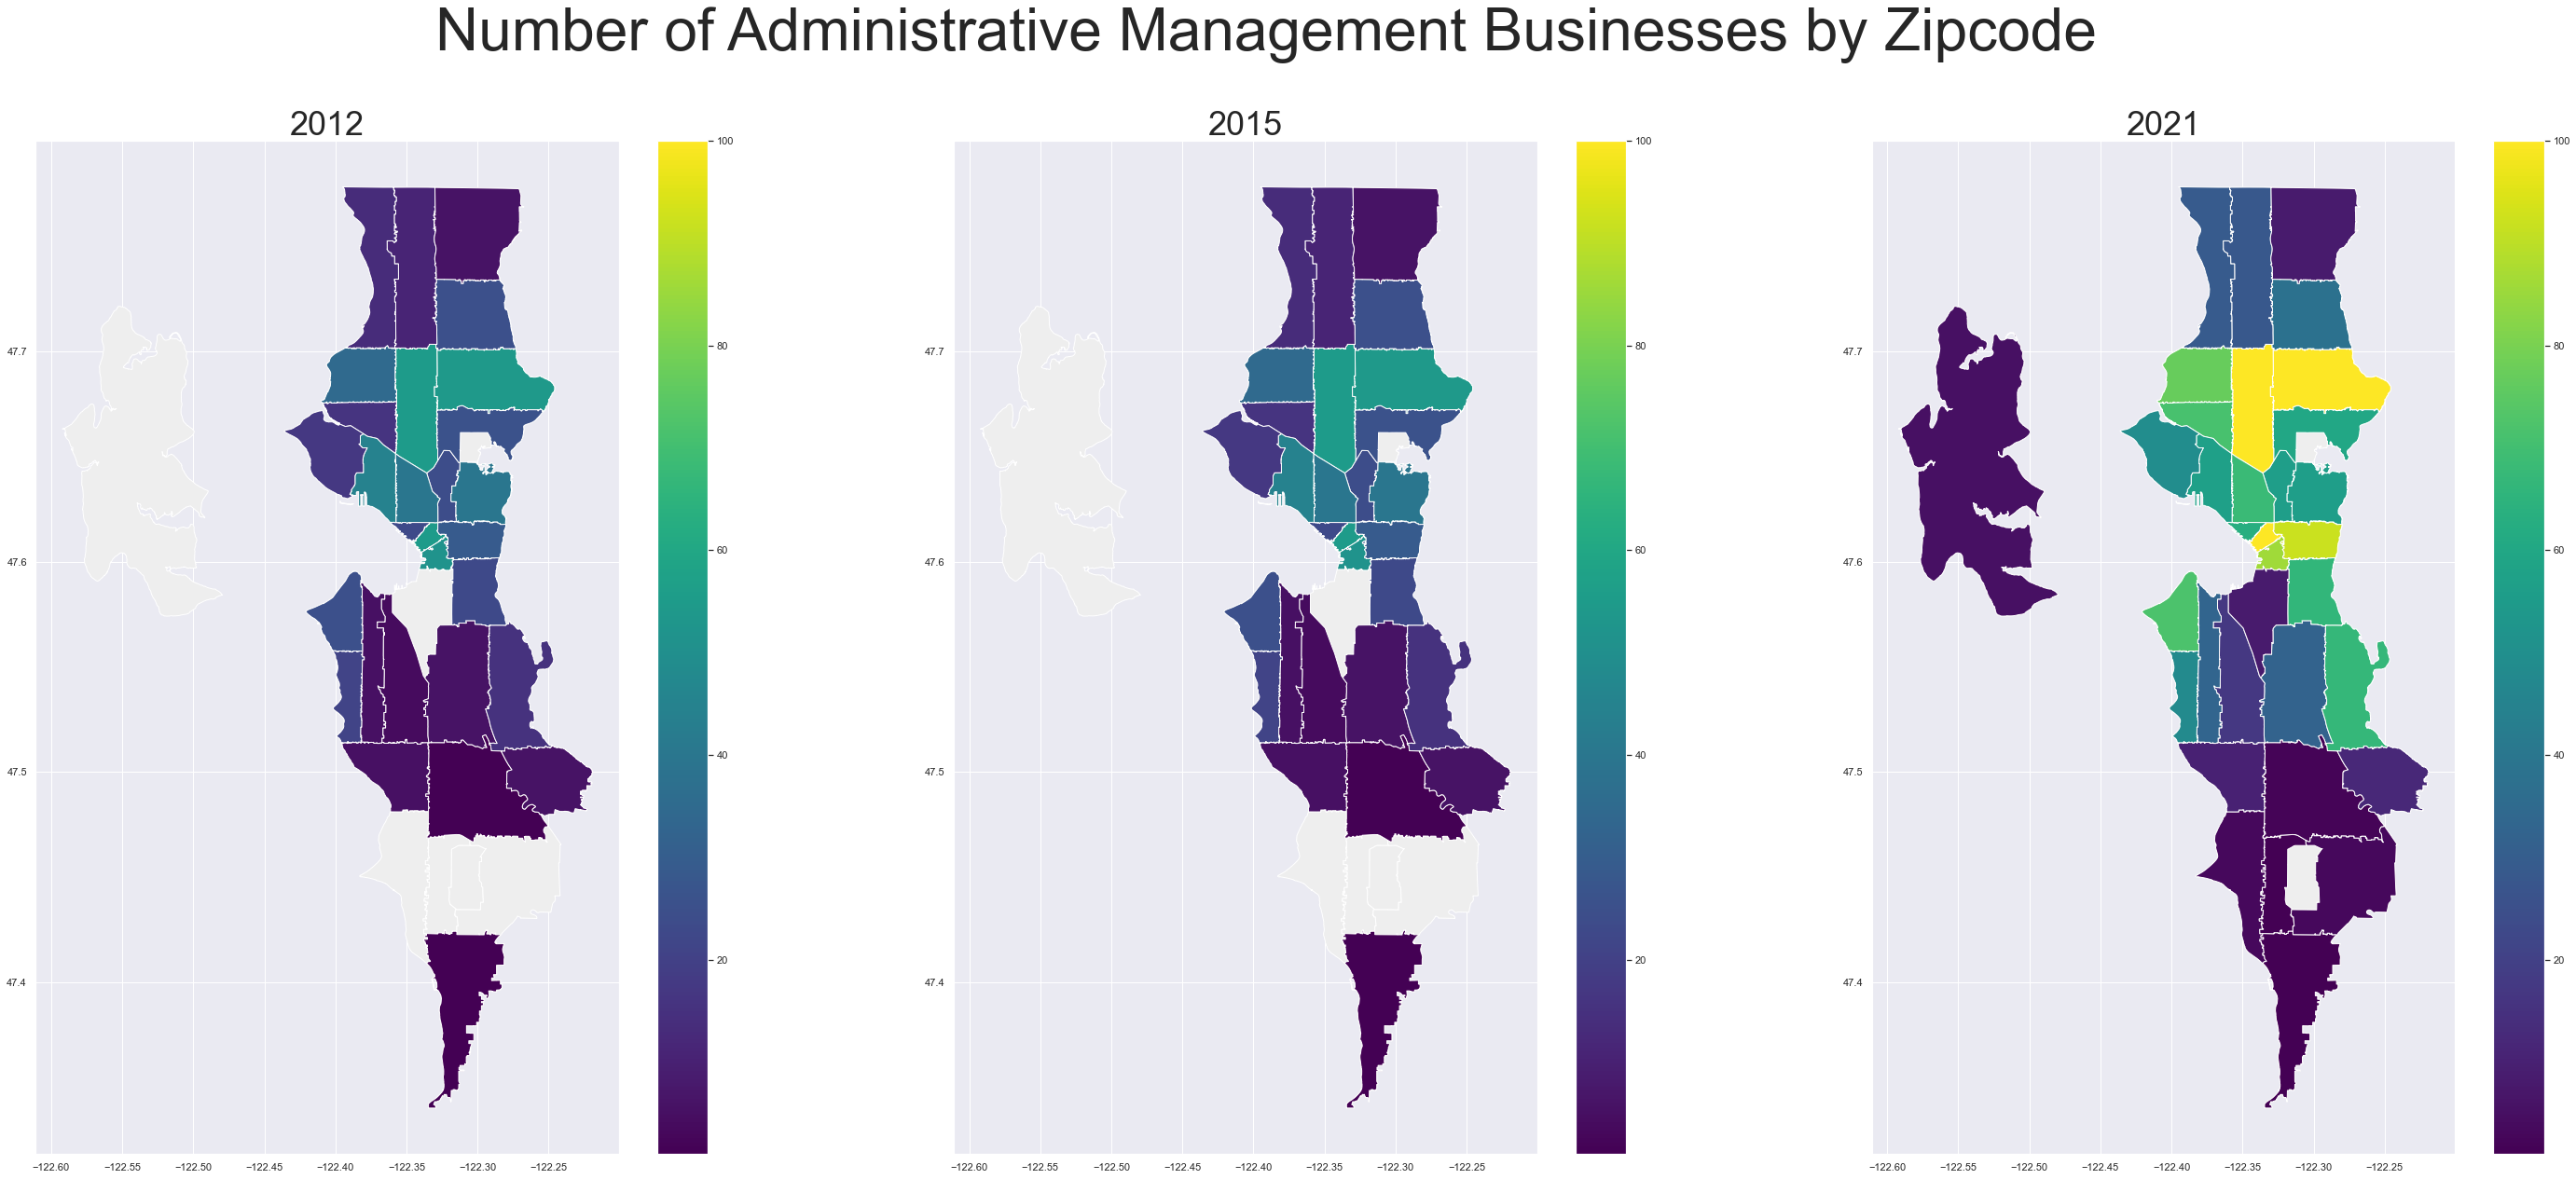

In [160]:
# Admin data for each year
admin_2012 = filter_naics(license_2012, 541611)
admin_2015 = filter_naics(license_2015, 541611)
admin_2021 = filter_naics(license_2021, 541611)

admin_2012.loc[:, "Zip"] = parse_zipcode(admin_2012, "city_state_zip")
admin_2015.loc[:, "Zip"] = parse_zipcode(admin_2015, "City, State, ZIP")
admin_2021.loc[:, "Zip"] = admin_2021["Zip"].str[:5]

# Get the number of businesses per zipcode
admin_zipcode_2012 = get_zipcode_counts(admin_2012, seattle_zipcode_data, seattle_zipcodes)
admin_zipcode_2015 = get_zipcode_counts(admin_2015, seattle_zipcode_data, seattle_zipcodes)
admin_zipcode_2021 = get_zipcode_counts(admin_2021, seattle_zipcode_data, seattle_zipcodes)

# Plot the data
fig, ax = plt.subplots(1, 3, figsize=(50, 20))
fig.suptitle("Number of Administrative Management Businesses by Zipcode", fontsize=64)

seattle_plot = seattle_zipcode_data[seattle_zipcode_data["ZIP"].isin(seattle_zipcodes)]
seattle_plot.plot(ax=ax[0], color="#EEEEEE")
seattle_plot.plot(ax=ax[1], color="#EEEEEE")
seattle_plot.plot(ax=ax[2], color="#EEEEEE")

admin_zipcode_2012.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[0])
ax[0].set_title("2012", fontsize=36)

admin_zipcode_2012.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[1])
ax[1].set_title("2015", fontsize=36)

admin_zipcode_2021.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[2])
ax[2].set_title("2021", fontsize=36)

plt.savefig("figures/admin_businesses_per_zipcode.png", bbox_inches="tight")
plt.show()

/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/835339971.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_2012.loc[:, "Zip"] = parse_zipcode(health_2012, "city_state_zip")
/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/835339971.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_2015.loc[:, "Zip"] = parse_zipcode(health_2015, "City, State, ZIP")
/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/835339971.py:8: SettingWithCopyWarning: 
A va

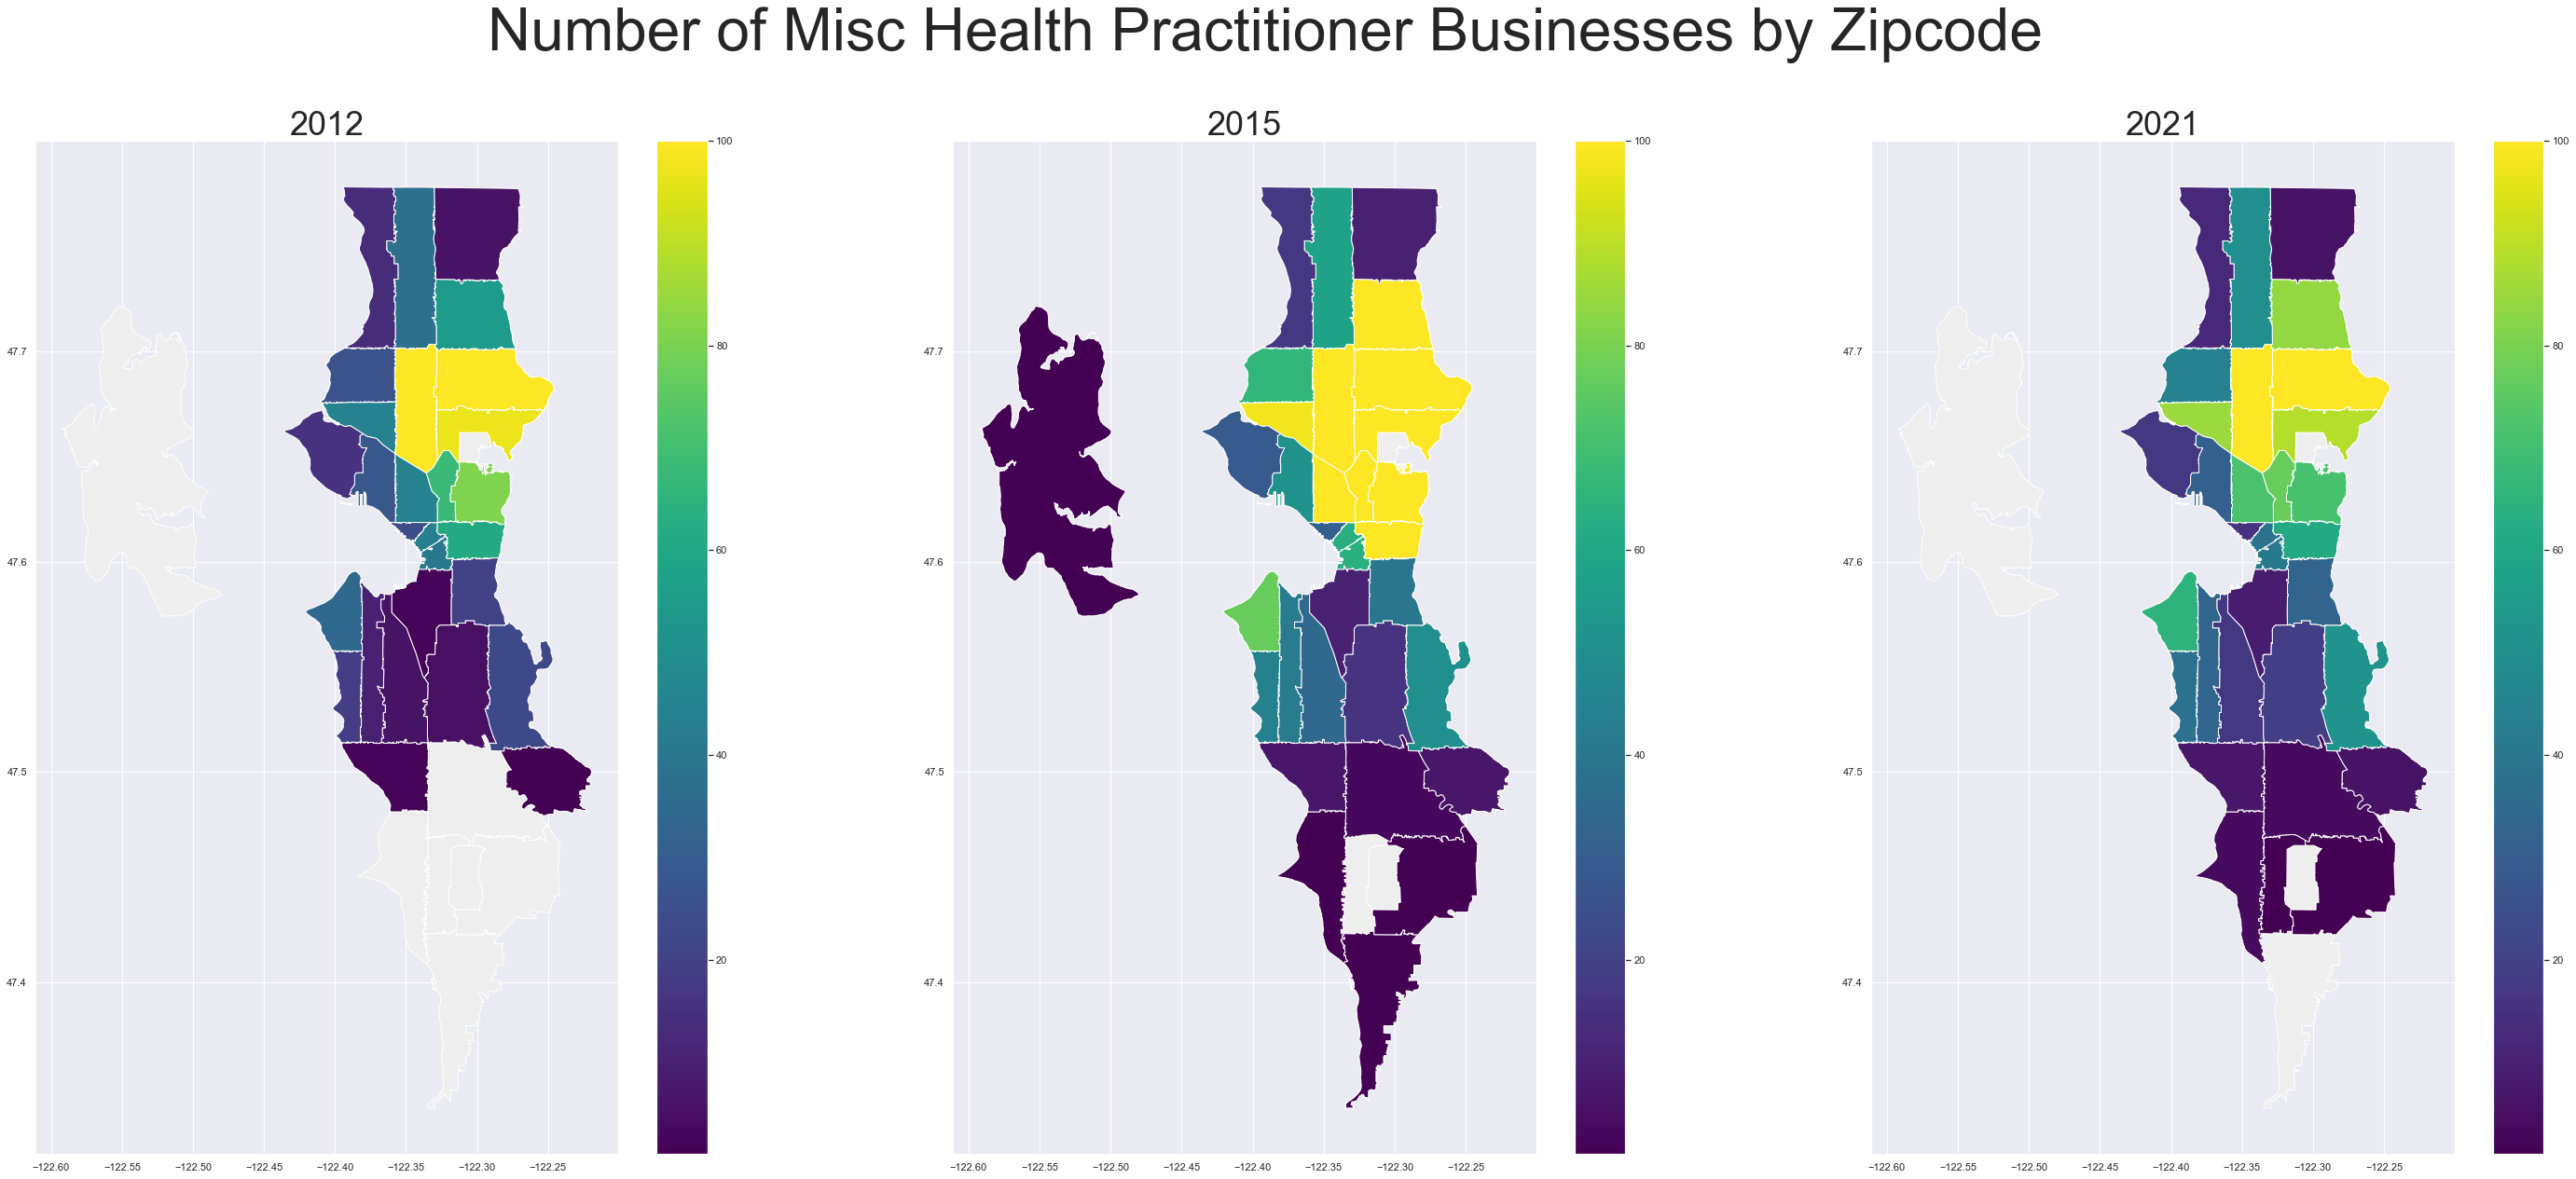

In [161]:
# Health data for each year
health_2012 = filter_naics(license_2012, 621399)
health_2015 = filter_naics(license_2015, 621399)
health_2021 = filter_naics(license_2021, 621399)

health_2012.loc[:, "Zip"] = parse_zipcode(health_2012, "city_state_zip")
health_2015.loc[:, "Zip"] = parse_zipcode(health_2015, "City, State, ZIP")
health_2021.loc[:, "Zip"] = health_2021["Zip"].str[:5]

# Get the number of businesses per zipcode
health_zipcode_2012 = get_zipcode_counts(health_2012, seattle_zipcode_data, seattle_zipcodes)
health_zipcode_2015 = get_zipcode_counts(health_2015, seattle_zipcode_data, seattle_zipcodes)
health_zipcode_2021 = get_zipcode_counts(health_2021, seattle_zipcode_data, seattle_zipcodes)

# Plot the data
fig, ax = plt.subplots(1, 3, figsize=(50, 20))
fig.suptitle("Number of Misc Health Practitioner Businesses by Zipcode", fontsize=64)

seattle_plot = seattle_zipcode_data[seattle_zipcode_data["ZIP"].isin(seattle_zipcodes)]
seattle_plot.plot(ax=ax[0], color="#EEEEEE")
seattle_plot.plot(ax=ax[1], color="#EEEEEE")
seattle_plot.plot(ax=ax[2], color="#EEEEEE")

health_zipcode_2012.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[0])
ax[0].set_title("2012", fontsize=36)

health_zipcode_2015.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[1])
ax[1].set_title("2015", fontsize=36)

health_zipcode_2021.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[2])
ax[2].set_title("2021", fontsize=36)

plt.savefig("figures/health_businesses_per_zipcode.png", bbox_inches="tight")
plt.show()

/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/4120536639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_2012.loc[:, "Zip"] = parse_zipcode(other_2012, "city_state_zip")
/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/4120536639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_2015.loc[:, "Zip"] = parse_zipcode(other_2015, "City, State, ZIP")
/var/folders/r2/jq0wysbs7pb0wn4ydzsf_wzm0000gn/T/ipykernel_49162/4120536639.py:8: SettingWithCopyWarning: 
A val

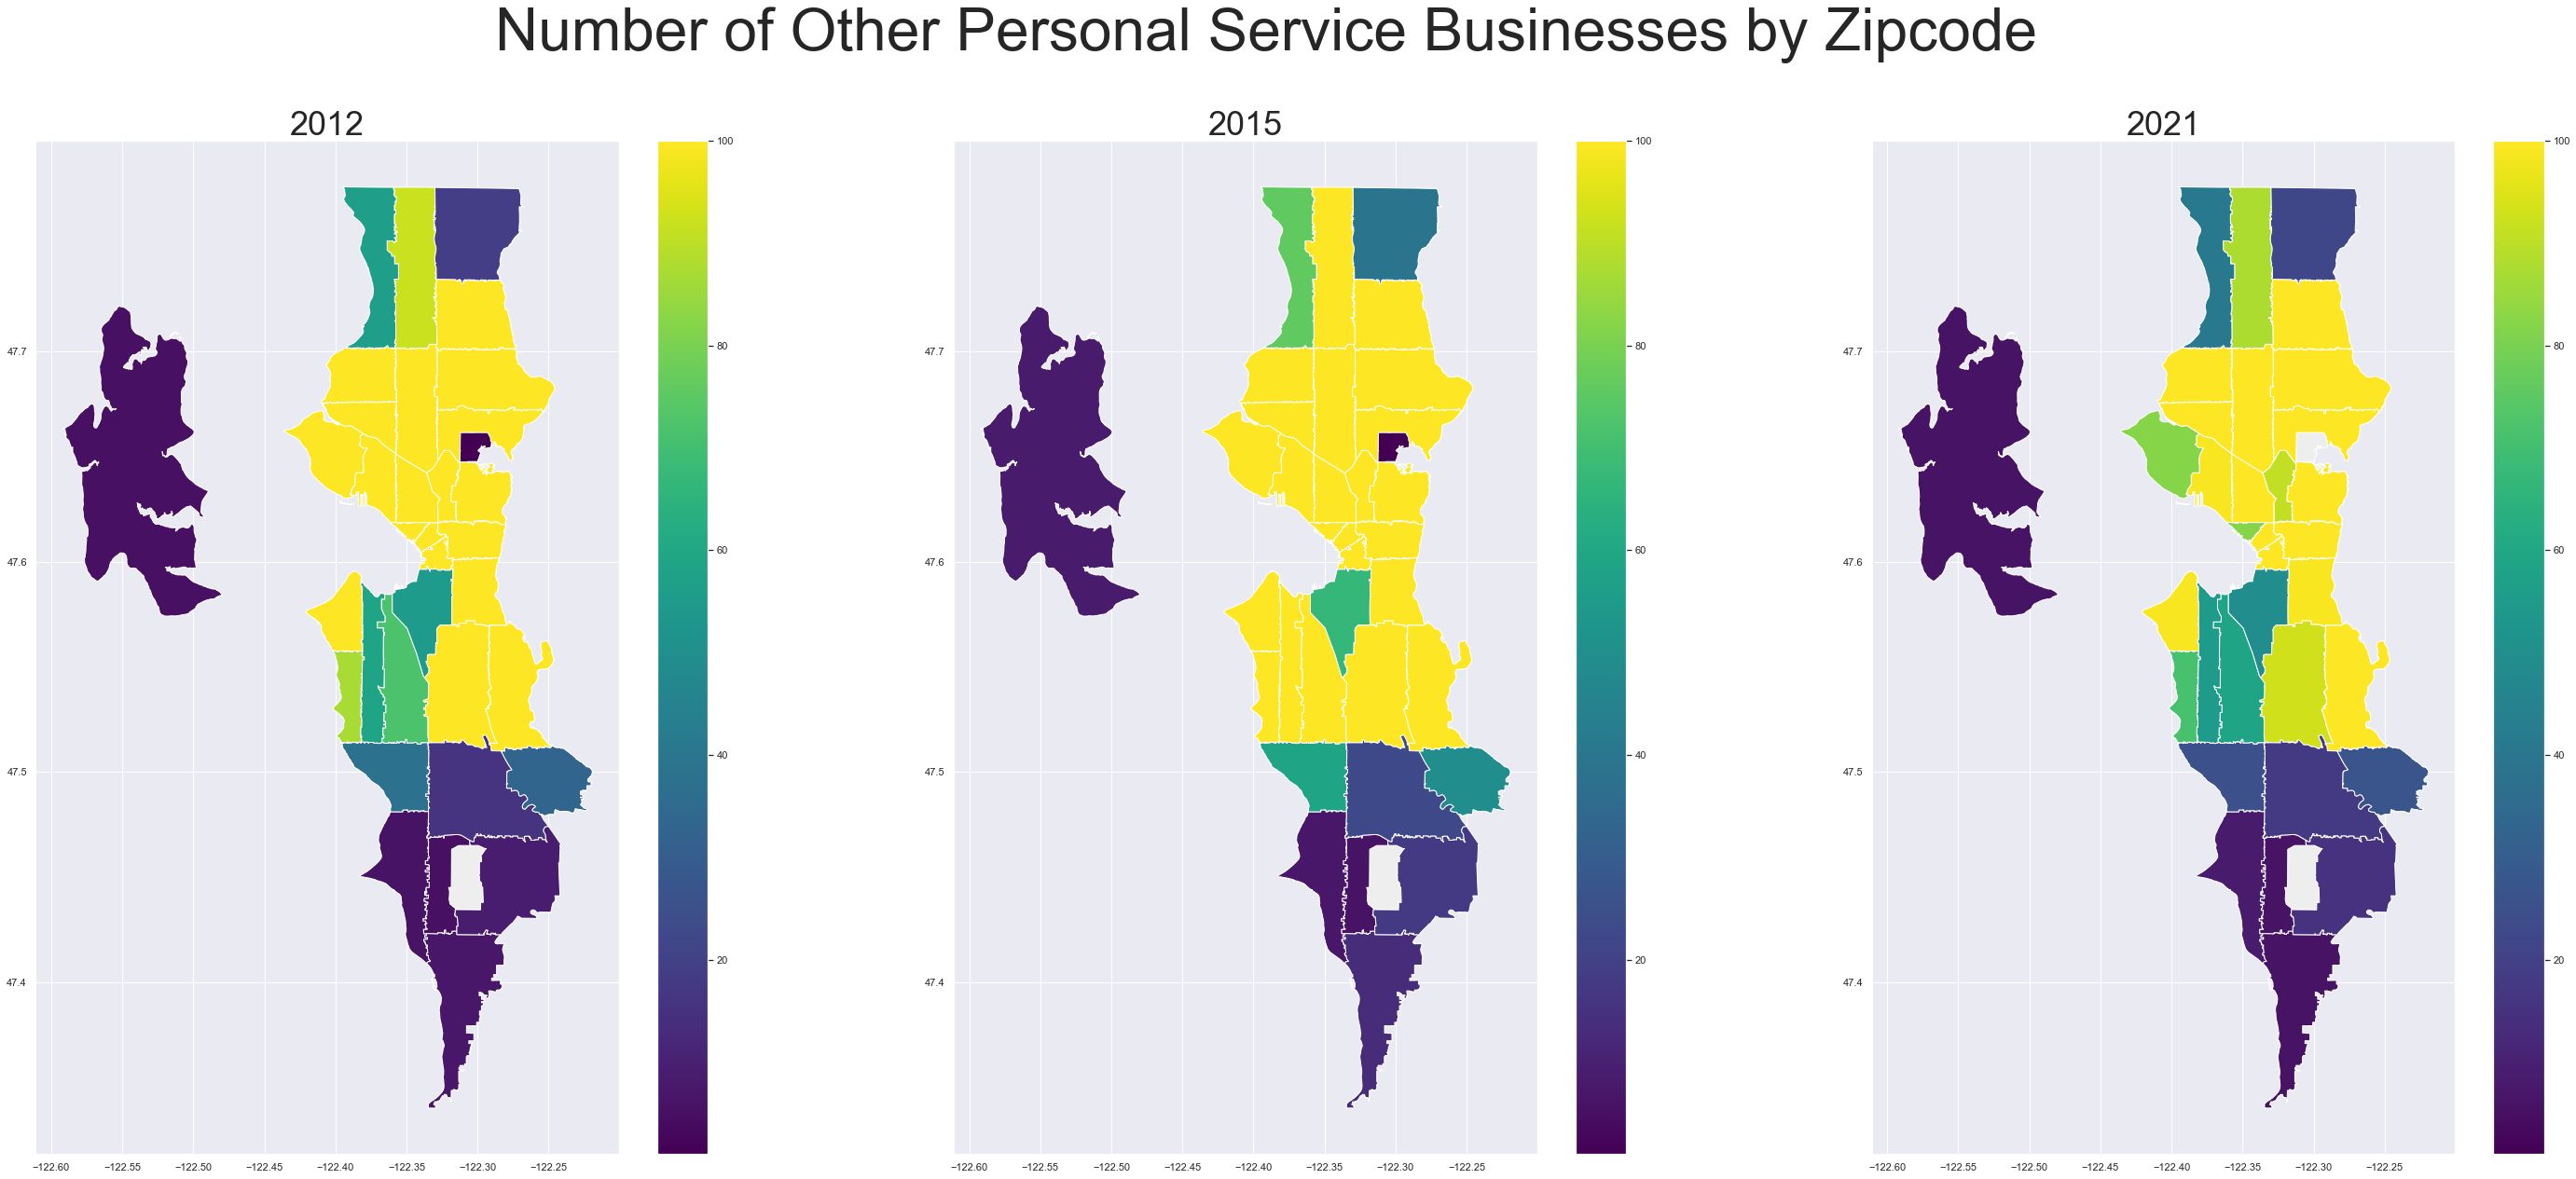

In [162]:
# Other personal services data for each year
other_2012 = filter_naics(license_2012, 812990)
other_2015 = filter_naics(license_2015, 812990)
other_2021 = filter_naics(license_2021, 812990)

other_2012.loc[:, "Zip"] = parse_zipcode(other_2012, "city_state_zip")
other_2015.loc[:, "Zip"] = parse_zipcode(other_2015, "City, State, ZIP")
other_2021.loc[:, "Zip"] = other_2021["Zip"].str[:5]

# Get the number of businesses per zipcode
other_zipcode_2012 = get_zipcode_counts(other_2012, seattle_zipcode_data, seattle_zipcodes)
other_zipcode_2015 = get_zipcode_counts(other_2015, seattle_zipcode_data, seattle_zipcodes)
other_zipcode_2021 = get_zipcode_counts(other_2021, seattle_zipcode_data, seattle_zipcodes)

# Plot the data
fig, ax = plt.subplots(1, 3, figsize=(50, 20))
fig.suptitle("Number of Other Personal Service Businesses by Zipcode", fontsize=64)

seattle_plot = seattle_zipcode_data[seattle_zipcode_data["ZIP"].isin(seattle_zipcodes)]
seattle_plot.plot(ax=ax[0], color="#EEEEEE")
seattle_plot.plot(ax=ax[1], color="#EEEEEE")
seattle_plot.plot(ax=ax[2], color="#EEEEEE")

other_zipcode_2012.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[0])
ax[0].set_title("2012", fontsize=36)

other_zipcode_2015.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[1])
ax[1].set_title("2015", fontsize=36)

other_zipcode_2021.plot(column="Count", legend=True, vmin=1, vmax=100, cmap="viridis", ax=ax[2])
ax[2].set_title("2021", fontsize=36)

# plt.savefig("figures/other_businesses_per_zipcode.png", bbox_inches="tight")
plt.show()